In [3]:

url = "https://entries.horseracingnation.com/entries-results/keeneland/2023-04-26"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [114]:

def parse_entries(table):
    
    table_data = []
    rows = table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        if len(row['class']) > 0:
            if row['class'][0] == 'scratched':
                running = 0
                program_number = int(cols[0]['data-label'].split()[-1])
            else:
                raise ValueError()
        else:
            running = 1
            program_number = int(cols[0].find('img')['alt'])
        horse = cols[3].find('h4').text.strip()
        sire = cols[3].find('p').text.strip()
        trainer = cols[4].find('p').text.strip()
        jockey = cols[4].find_all('p')[-1].text.strip()
        morning_line_odds = cols[6].find('p').text.strip()
        table_data.append([running, program_number, horse, sire, trainer, jockey, morning_line_odds])
    
    return pd.DataFrame(table_data, columns=['running','horse','horse_name','sire','trainer','jockey','ml_odds'])
entry_tables = soup.find_all('table', {'class': 'table-entries'})
table = entry_tables[0]
test = extract_entries(table)


In [105]:

track_dates = [
    ('keeneland','2023-04-21'),
    ('keeneland','2023-04-22'),
    ('keeneland','2023-04-23'),
    ('keeneland','2023-04-26'),
    ('keeneland','2023-04-27'),
    ('keeneland','2023-04-28'),
    ('churchill-downs','2023-04-29')
]

for track, date in track_dates:
    url = f"https://entries.horseracingnation.com/entries-results/{track}/{date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    entry_tables = soup.find_all('table', {'class': 'table-entries'})

    


In [143]:

def parse_meta(info, restriction, purse):
    race_info = info.text.split(',\n')
    race_info = [x.strip() for x in race_1_info]
    race_1_dist, race_1_track, race_1_type = race_1_info
    restriction = restriction[0].text.strip()
    purse = purse.text.replace('Purse: ','').strip()
    return [race_1_dist, race_1_track, race_1_type, restriction, purse]
race_info = soup.find_all('div', {'class': 'race-distance'})
race_restrictions = soup.find_all('div', {'class': 'race-restrictions'})
race_purses = soup.find_all('div', {'class': 'race-purse'})




'$30,000'

In [112]:

url = f"https://entries.horseracingnation.com/entries-results/churchill-downs/2023-04-29"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

entry_tables = soup.find_all('table', {'class': 'table-entries'})


In [127]:
len(entry_tables)

10

In [128]:
len(payout_tables)

10

In [129]:
len(also_rans)

10

In [130]:
len(exotic_payout_tables)

10

In [118]:
from copy import copy
def convert_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        num, denom = frac_str.split('/')
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac
    
def extract_payouts(row, finish):
    cols = row.find_all('td')
    horse_name = cols[0].text.strip()
    horse_number = int(cols[1].find('img')['alt'])
    win_paid = cols[2].text.strip()
    place_paid = cols[3].text.strip()
    show_paid = cols[4].text.strip()
    if win_paid == '-':
        win_paid = 0
    if place_paid == '-':
        place_paid = 0
    if show_paid == '-':
        show_paid = 0
    
    return [finish, horse_name, win_paid, place_paid, show_paid]

payout_tables = soup.find_all('table', {'class': 'table-payouts'})
also_rans = soup.find_all('div', {'class': 'race-also-rans'})

payout_table = payout_tables[0]
ar = also_rans[0]

table = copy(payout_table)
rows = table.find_all('tr')


win_row = rows[1]
place_row = rows[2]
show_row = rows[3]
payout_data = [extract_payouts(win_row,1),extract_payouts(place_row,2),extract_payouts(show_row,3)]
if len(rows)>=5:
    fourth_row = rows[4]
    payout_data.append(extract_payouts(fourth_row,4))
    
ar = ar.text.strip().replace('Also rans: ','')
ars = ar.split(', ')
ar_start = len(rows)
for i, horse in enumerate(ars):
    payout_data.append([i+ar_start, horse, 0, 0, 0])
payout_data = pd.DataFrame(payout_data, columns=['finish','horse_name','win_paid','place_paid','show_paid'])

exotic_payout_tables = soup.find_all('table', {'class': 'table-exotic-payouts'})
exotic_table = exotic_payout_tables[0]
exotic_payout_data = []
exotic_rows = exotic_table.find_all('tr')
for row in exotic_rows:
    cols = row.find_all('td')
    if len(cols) < 3:
        continue
    exotic_payout_data.append([col.text.strip() for col in cols])
    
exotic_payout_data = pd.DataFrame(exotic_payout_data, columns=['pool','finish','$2_payout','total_pool'])


In [119]:
payout_data

,finish,horse_name,win_paid,place_paid,show_paid
0,1,Invasive,$45.40,$18.54,$8.50
1,2,Texas Ted,0,$8.94,$5.60
2,3,My Favorite Uncle,0,0,$3.50
3,4,Hail Allen,0,0,0
4,5,Spuns Son,0,0,0
5,6,Bluegrass Lute,0,0,0
6,7,Mr. Yasuda,0,0,0
7,8,Faneuil Hall,0,0,0
8,9,Military Code,0,0,0


In [116]:

def convert_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        num, denom = frac_str.split('/')
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac
# test = test.merge(payout_data, how='left', on=['horse_name']).fillna(0)
# test['finish'] = test['finish'].astype(int)
test['ml_odds'].apply(lambda x: convert_to_float(x)).astype(float)


0     4.0
1     4.5
2     8.0
3    15.0
4     5.0
5     5.0
6     3.0
7    20.0
8    15.0
9    20.0
Name: ml_odds, dtype: float64

In [70]:

headers = soup.find_all('a', {'class': 'race-header'})
text_list = headers[0].text.split()
num = text_list.index('#')
race_num = int(text_list[num+1][:-1])
race_n
um



1

In [60]:

def list_of_entries():
    
    return


tables = soup.find_all('table', {'class': 'table-entries'})
table = tables[-1]

# for row in rows:
#     cols = row.find_all('td')
#     for col in cols:
#         print(col.text)



### Fri Apr 21, 2023


In [5]:

kee_1 = pd.DataFrame({
    'date':np.repeat('Friday, April 21, 2023', 6),
    'track':np.repeat('Keeneland', 6),
    'race':list(range(5, 11)),
    'winner':[4,4,5,3,3,7],
    'second':[7,3,3,2,7,5],
    'third':[2,5,10,6,2,2],
    'win_paid':[7.14, 5.46, 10.64, 10.56, 11.06, 15.9],
    'win_place_paid':[3.58, 3.50, 5.76,5.10,5.86,5.90],
    'win_show_paid':[3.02, 2.94, 4.38, 3.92, 3.72, 4.00],
    'second_paid':[3.66,6.02,14.84,3.96,8.46,2.64],
    'second_show_paid':[3.08, 4.18, 9.58, 2.94, 4.40, 2.52],
    'third_paid':[8.58, 4.22, 15.30, 4.18, 3.44, 4.56]
})




In [6]:

kee_1_race_5 = pd.DataFrame.from_dict({
    1:[1, 15, 63.52 ],
    2:[1, 20, 62.18 ],
    3:[1, 3.5, 63.12 ],
    4:[1, 4.5, 61.87 ],
    5:[0, 8, 0 ],
    6:[1, 6, 62.23 ],
    7:[1, 3, 61.88 ],
    8:[1, 30, 64.39 ],
    9:[0, 15, 0 ],
    10:[1, 12, 62.55],
    11:[1, 30, 63.75],
    12:[1, 20, 62.67],
    13:[1, 6, 62.51 ],
    14:[1, 12, 63.75],
    15:[0, 20, 0 ],
    16:[0, 20, 0]
})
kee_1_race_6 = pd.DataFrame({
    1:[1, 2, 78.53],
    2:[1, 3.5, 78.54],
    3:[1, 6, 77.67],
    4:[1, 2.5, 77.66],
    5:[1, 8, 77.92],
    6:[1, 20, 79.64],
    7:[0, 15, 0],
    8:[1, 30, 79.49]
})

kee_1_race_7 = pd.DataFrame({
    1:[0, 4, 0],
    2:[0, 4.5, 0],
    3:[1, 10, 79.18],
    4:[1, 20, 80.60],
    5:[1, 8, 78.91],
    6:[1, 10, 79.47],
    7:[1, 30, 82.55],
    8:[1, 4.5, 80.02],
    9:[1, 3.5, 82.50],
    10:[1, 30, 79.18],
    11:[1, 12, 80.20]
})

kee_1_race_8 = pd.DataFrame({
    1:[1, 4, 102.33],
    2:[1, 2, 101.99],
    3:[1, 3, 101.93],
    4:[1, 8, 102.40],
    5:[1, 20, 102.49],
    6:[1, 10, 102.02],
    7:[0, 30, 0],
    8:[1, 15, 102.67],
    9:[1, 20, 102.31],
    10:[1, 8, 102.25],
    11:[0, 4, 0]
})

kee_1_race_9 = pd.DataFrame({
    1:[1, 8, 105.60],
    2:[1, 3, 104.36],
    3:[1, 12, 103.95],
    4:[1, 1.2, 104.47],
    5:[0, 15, 0],
    6:[0, 30, 0],
    7:[1, 4, 104.10],
    8:[1, 15, 105.37]
})

kee_1_race_10 = pd.DataFrame({
    1:[1, 15, 109.72],
    2:[1, 4.5, 108.89],
    3:[1, 20, 110.59],
    4:[1, 12, 110.17],
    5:[1, 2, 108.77],
    6:[1, 20, 110.14],
    7:[1, 4, 108.64],
    8:[1, 30, 109.85],
    9:[1, 6, 109.49],
    10:[1, 8, 110.42],
    11:[1, 30, 110.17],
    12:[0, 3.5, 0]
})



kee_1_race_5 = kee_1_race_5.T
kee_1_race_5 = kee_1_race_5.reset_index()
kee_1_race_5.columns=['horse','scratched','ml_odds','time']
kee_1_race_5['race'] = 5

kee_1_race_6 = kee_1_race_6.T
kee_1_race_6 = kee_1_race_6.reset_index()
kee_1_race_6.columns=['horse','scratched','ml_odds','time']
kee_1_race_6['race'] = 6

kee_1_race_7 = kee_1_race_7.T
kee_1_race_7 = kee_1_race_7.reset_index()
kee_1_race_7.columns=['horse','scratched','ml_odds','time']
kee_1_race_7['race'] = 7

kee_1_race_8 = kee_1_race_8.T
kee_1_race_8 = kee_1_race_8.reset_index()
kee_1_race_8.columns=['horse','scratched','ml_odds','time']
kee_1_race_8['race'] = 8

kee_1_race_9 = kee_1_race_9.T
kee_1_race_9 = kee_1_race_9.reset_index()
kee_1_race_9.columns=['horse','scratched','ml_odds','time']
kee_1_race_9['race'] = 9

kee_1_race_10 = kee_1_race_10.T
kee_1_race_10 = kee_1_race_10.reset_index()
kee_1_race_10.columns=['horse','scratched','ml_odds','time']
kee_1_race_10['race'] = 10

kee_1_results = pd.concat([
    kee_1_race_5,
    kee_1_race_6,
    kee_1_race_7,
    kee_1_race_8,
    kee_1_race_9,
    kee_1_race_10
],axis=0).reset_index(drop=True)




In [26]:


quincy_a = {
    5:[3,7],
    6:[1,2,3,4,5],
    7:[3,6,8,9],
    8:[1,3,6,10],
    9:[1,2,4],
    10:[1,5,7,9]
}

quincy_b = {
    5:[4,12,13],
    6:[],
    7:[5,11],
    8:[],
    9:[],
    10:[]
}

nick_a = {
    5:[7,13],
    6:[1],
    7:[2,8,9],
    8:[1,2,6,8],
    9:[2,4],
    10:[5,7]
}

nick_b = {
    5:[3,4,6],
    6:[2,4,7],
    7:[5],
    8:[3,4],
    9:[1],
    10:[2,4,10]
}

blake_a = {
    5:[3,4],
    6:[1],
    7:[1,2,3,6,8,11],
    8:[1,6],
    9:[2,4],
    10:[1,2,5]
}

blake_b = {
    5:[1],
    6:[2,3,4],
    7:[],
    8:[2,3,7],
    9:[3],
    10:[7]
}

marty_a = {
    5:[1,3,4,7],
    6:[1,2,3,4,5],
    7:[1,2,8,9],
    8:[1,2,3,6,10],
    9:[1,2,4,7,8],
    10:[1,2,4,5,7]
}

marty_b = {
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[]
}

holmes_a = {
    5:[3,4,5,7],
    6:[1,4,5],
    7:[1,5,6,9],
    8:[1,2,3],
    9:[4],
    10:[5,7]
}

holmes_b = {
    5:[],
    6:[2,3],
    7:[],
    8:[9],
    9:[],
    10:[2]
}

jason_o_a = {
    5:[3,7],
    6:[2,4],
    7:[6,8,9],
    8:[1,3],
    9:[4],
    10:[2,5,7,9]
}

jason_o_b = {
    5:[4],
    6:[1,3,5,7],
    7:[1,2,5,11],
    8:[2,6],
    9:[2,3,7],
    10:[]
}

hersch_a = {
    5:[3,4,7],
    6:[4,3,2],
    7:[2,6,11],
    8:[1,3,9],
    9:[2,4,3],
    10:[5,2,4]
}

hersch_b = {
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[]
}

elbadwi_a = {
    5:[2,7,4],
    6:[2,4,5],
    7:[9,8,5],
    8:[6,10,4],
    9:[2,4,1],
    10:[5,2,4]
}

elbadwi_b = {
    5:[2,3],
    6:[2,3],
    7:[9,6],
    8:[6,1],
    9:[2,7],
    10:[5,6]
}





In [31]:

sharps = ['Quincy','Marty','Blake','Nick','Holmes','Jason_O','Hersch','Elbadwi']
pick_dict = {
    'Quincy':{'A':quincy_a,'B':quincy_b,'weight':1},
    'Marty':{'A':marty_a,'B':marty_b,'weight':1},
    'Blake':{'A':blake_a,'B':blake_b,'weight':1.25},
    'Nick':{'A':nick_a,'B':nick_b,'weight':1},
    'Holmes':{'A':holmes_a,'B':holmes_b,'weight':1.25},
    'Jason_O':{'A':jason_o_a,'B':jason_o_b,'weight':1.5},
    'Hersch':{'A':hersch_a,'B':hersch_b,'weight':2},
    'Elbadwi':{'A':elbadwi_a,'B':elbadwi_b, 'weight':0.75}
}

for sharp in sharps:
    kee_1[f'{sharp}_A'] = kee_1['race'].copy().map(pick_dict[sharp]['A'])
    kee_1[f'{sharp}_B'] = kee_1['race'].copy().map(pick_dict[sharp]['B'])
    
    kee_1[f'{sharp}_points'] = kee_1.apply(lambda x: 10*int(x['winner'] in x[f'{sharp}_A'])+5*int(x['winner'] in x[f'{sharp}_B']), axis=1)
    kee_1[f'{sharp}_horses_used'] = kee_1.apply(lambda x: len(x[f'{sharp}_A'])+0.5*len(x[f'{sharp}_B']), axis=1)
    
    kee_1[f'{sharp}_invested'] = kee_1[f'{sharp}_horses_used']*100 
    ## toggle this
    kee_1[f'{sharp}_return'] = ((kee_1['win_paid'].copy()/2)-1)*(kee_1[f'{sharp}_points']*10) + (kee_1[f'{sharp}_points']*10)
    



In [32]:

daily_summary = []

for sharp in sharps:
    sharp_roi = kee_1[f'{sharp}_return'].sum()/kee_1[f'{sharp}_invested'].sum()
    sharp_WPP = kee_1[f'{sharp}_points'].sum()/kee_1[f'{sharp}_horses_used'].sum()
    daily_summary.append([sharp, sharp_roi, sharp_WPP])

daily_summary = pd.DataFrame(daily_summary, columns=['Sharp', 'ROI', 'WinPerPick'])
daily_summary.sort_values(by=['ROI'], ascending=False)
    


,Sharp,ROI,WinPerPick
4,Holmes,1.307895,2.631579
5,Jason_O,1.103333,2.142857
6,Hersch,0.950556,2.222222
0,Quincy,0.832857,1.632653
3,Nick,0.800000,1.463415
2,Blake,0.698293,1.463415
1,Marty,0.697500,1.428571
7,Elbadwi,0.484167,1.250000


### Sat Apr 22, 2023

In [9]:

nick_a = {
    5:[3,7],
    6:[4,5,7,8,11],
    7:[4,7],
    8:[2,5],
    9:[1,4,5],
    10:[1,3,5,6,7]
}

nick_b = {
    5:[4,8],
    6:[6],
    7:[],
    8:[1,7],
    9:[2],
    10:[2,10]
}

blake_a = {
    5:[3],
    6:[5,7],
    7:[7],
    8:[2],
    9:[4,5],
    10:[2,3,5,7,11]
}

blake_b = {
    5:[4,5,7],
    6:[1,3,4,5,6,9,10],
    7:[4],
    8:[1,4,5,7],
    9:[1],
    10:[6,10]
}



quincy_a = {
    5:[3,4,7],
    6:[1,5,7,8],
    7:[7],
    8:[1,2,7],
    9:[7],
    10:[2,3,8]
}

quincy_b = {
    5:[], 
    6:[],
    7:[],
    8:[],
    9:[4,5],
    10:[]
}

marty_a = {
    5:[3,4,7],
    6:[4,6,7],
    7:[7],
    8:[1,2,5],
    9:[4,5],
    10:[2,3,11]
}

marty_b = {
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[]
}

holmes_a = {
    5:[3,7],
    6:[4,5,6,8],
    7:[7],
    8:[2,3,5,7],
    9:[4,7],
    10:[3,5,7,8]
}

holmes_b = {
    5:[4],
    6:[1,3,7],
    7:[],
    8:[],
    9:[1],
    10:[2,6,10]
}


jason_o_a = {
    5:[3,7],
    6:[4,5,6,7],
    7:[7],
    8:[2,3,7],
    9:[4,5],
    10:[2,3,7,8]
}

jason_o_b = {
    5:[1,4],
    6:[1,2,3],
    7:[4],
    8:[1,5,9],
    9:[1,7],
    10:[5,6,10,11]
}

duke_a = {
    5:[3,7],
    6:[3,6,7,8,11],
    7:[7],
    8:[2,3,4,5],
    9:[4,5],
    10:[2,7,8,10,11]
}

duke_b = {
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[]
}

kelsch_a = {
    5:[7],
    6:[6],
    7:[7],
    8:[2,7],
    9:[1],
    10:[5]
}

kelsch_b = {
    5:[3,5],
    6:[4,7,8],
    7:[4],
    8:[1,5],
    9:[4,5,6],
    10:[2,3,8]
}

kyle_a = {
    5:[3,7],
    6:[4,5,7,11],
    7:[7],
    8:[2,3,7],
    9:[5,7],
    10:[2,3]
}

kyle_b = {
    5:[],
    6:[1,6],
    7:[4,6],
    8:[4,9],
    9:[3],
    10:[5]
}

fat_bald_a = {
    5:[3,4,1],
    6:[5,6,4],
    7:[7],
    8:[1,2,5,7],
    9:[4,2,5],
    10:[5,6,8,10]
}
fat_bald_b = {
    5:[8,7,5,2],
    6:[8,7,11],
    7:[2,4,5,6],
    8:[3,4,8,10],
    9:[1,7],
    10:[1,2,3,9,7,11]
}

hersch_a = {
    5:[3,1,4],
    6:[3,4,7],
    7:[2,4,7],
    8:[3,2,5],
    9:[4,2,5],
    10:[7,14,8]
}

hersch_b = {
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[]
}

somich_a = {
    5:[3,4,1],
    6:[1,4,5,7],
    7:[2,4],
    8:[2,3,7],
    9:[4,7],
    10:[2,3,5]
}

somich_b = {
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[]
}

plonk_a = {
    5:[7,8],
    6:[3,7],
    7:[7,2],
    8:[2,4],
    9:[4,1],
    10:[3,6]
}
plonk_b = {
    5:[3],
    6:[6],
    7:[3],
    8:[8],
    9:[5],
    10:[2]
}






In [10]:

# kee_r4 = np.array([
#     [1, 1, 3.5, 83.85],
#     [2, 1, 1.8, 83.52],
#     [3, 1, 2.5, 85.20],
#     [4, 1, 4.5, 85.36],
#     [5, 1, 8, 86.15],
#     [6, 1, 12, 84.06],
#     [7, 1, 30, 84.78]
# ])

kee_r5 = np.array([
    [1, 1, 20, 110.59],
    [2, 1, 12, 111.45],
    [3, 1, 1.4, 110.10],
    [4, 1, 4.5, 110.01],
    [5, 1, 10, 110.32],
    [6, 1, 20, 110.37],
    [7, 1, 3.5, 110.30],
    [8, 1, 4, 110.24]
])

kee_r6 = np.array([
    [1, 1, 20, 81.15],
    [2, 1, 20, 79.03],
    [3, 1, 15, 79.34],
    [4, 1, 4.5, 78.51],
    [5, 1, 8, 79.00],
    [6, 1, 4, 78.72],
    [7, 1, 2.5, 78.45],
    [8, 1, 6, 80.33],
    [9, 1, 20, 79.69],
    [10, 1, 30, 81.39],
    [11, 1, 10, 79.96],
    [12, 1, 50, 80.23],
    [13, 0, 20, 0]
])

kee_r7 = np.array([
    [1, 1, 15, 69.73],
    [2, 0, 3, 0],
    [3, 1, 30, 71.21],
    [4, 0, 4, 0],
    [5, 0, 0, 0],
    [6, 1, 8, 71.42],
    [7, 1, 1, 70.78],
])


kee_r8 = np.array([
    [1, 1, 4.5, 149.93],
    [2, 1, 3.5, 150.70],
    [3, 1, 6, 150.56],
    [4, 1, 15, 149.66],
    [5, 1, 2.5, 149.31],
    [6, 0, 30, 0],
    [7, 1, 10, 150.29],
    [8, 0, 5, 0],
    [9, 1, 20, 149.28],
    [10,1, 30, 150.12]
])

kee_r9 = np.array([
    [1, 1, 3.5, 116.80],
    [2, 1, 6, 117.90],
    [3, 1, 20, 116.72],
    [4, 1, 1.4, 117.90],
    [5, 1, 3, 116.48],
    [6, 1, 12, 117.33],
    [7, 1, 8, 119]
])

kee_r10 = np.array([
    [1, 1, 12, 62.92],
    [2, 1, 4, 62.89],
    [3, 1, 5, 62.60],
    [4, 1, 20, 63.37],
    [5, 1, 15, 62.23],
    [6, 1, 8, 63],
    [7, 1, 10, 62.76],
    [8, 1, 8, 62.42],
    [9, 0, 30, 0],
    [10, 1, 3.5, 62.45],
    [11, 1, 8, 62.57],
    [12, 1, 30, 63.03]
])


kee_r5 = pd.DataFrame(kee_r5, columns=['horse','scratched','ml_odds','time'])
kee_r5['race'] = 5
kee_r6 = pd.DataFrame(kee_r6, columns=['horse','scratched','ml_odds','time'])
kee_r6['race'] = 6
kee_r7 = pd.DataFrame(kee_r7, columns=['horse','scratched','ml_odds','time'])
kee_r7['race'] = 7
kee_r8 = pd.DataFrame(kee_r8, columns=['horse','scratched','ml_odds','time'])
kee_r8['race'] = 8
kee_r9 = pd.DataFrame(kee_r9, columns=['horse','scratched','ml_odds','time'])
kee_r9['race'] = 9
kee_r10 = pd.DataFrame(kee_r10, columns=['horse','scratched','ml_odds','time'])
kee_r10['race'] = 10

kee_2_results = pd.concat([
    kee_r5,
    kee_r6,
    kee_r7,
    kee_r8,
    kee_r9,
    kee_r10
],axis=0).reset_index(drop=True)


In [11]:


kee_2 = pd.DataFrame({
    'date':np.repeat('Saturday, April 22, 2023', 6),
    'track':np.repeat('Keeneland', 6),
    'race':list(range(5, 11)),
    'winner':[4,7,1,9,5,5],
    'second':[3,4,7,5,3,8],
    'third':[8,6,3,4,1,10],
    'win_paid':[14.20, 9.68, 28.10, 34.30, 7.98, 26.32],
    'win_place_paid':[5.30, 5.12, 5.04, 12.50, 5.18, 12.84],
    'win_show_paid':[3.30, 3.90, 4.10, 6.64, 3.40, 8.56],
    'second_paid':[3.02, 4.70, 2.20, 8.22, 12.84, 7.24],
    'second_show_paid':[2.54, 3.44, 2.10, 5.50, 5.48, 4.98],
    'third_paid':[2.96, 3.26, 5.32, 7.20, 3.84, 10.02]
})


sharps = ['Quincy','Marty','Blake','Nick','Holmes','Jason_O','Duke','Kelsch','Kyle','Fat Bald Guy','Hersch','Somich','Plonk']
pick_dict = {
    'Quincy':{'A':quincy_a,'B':quincy_b,'weight':1},
    'Marty':{'A':marty_a,'B':marty_b,'weight':1},
    'Blake':{'A':blake_a,'B':blake_b,'weight':1.25},
    'Nick':{'A':nick_a,'B':nick_b,'weight':1},
    'Holmes':{'A':holmes_a,'B':holmes_b,'weight':1.25},
    'Jason_O':{'A':jason_o_a,'B':jason_o_b,'weight':1.5},
    'Duke':{'A':duke_a,'B':duke_b,'weight':1},
    'Kelsch':{'A':kelsch_a,'B':kelsch_b,'weight':1},
    'Kyle':{'A':kyle_a,'B':kyle_b,'weight':1.5},
    'Fat Bald Guy':{'A':fat_bald_a,'B':fat_bald_b,'weight':1},
    'Hersch':{'A':hersch_a,'B':hersch_b,'weight':2},
    'Somich':{'A':somich_a,'B':somich_b,'weight':2},
    'Plonk':{'A':plonk_a,'B':plonk_b,'weight':1}
}

for sharp in sharps:
    kee_2[f'{sharp}_A'] = kee_2['race'].copy().map(pick_dict[sharp]['A'])
    kee_2[f'{sharp}_B'] = kee_2['race'].copy().map(pick_dict[sharp]['B'])
    
    kee_2[f'{sharp}_points'] = kee_2.apply(lambda x: 10*int(x['winner'] in x[f'{sharp}_A'])+5*int(x['winner'] in x[f'{sharp}_B']), axis=1)
    kee_2[f'{sharp}_horses_used'] = kee_2.apply(lambda x: len(x[f'{sharp}_A'])+0.5*len(x[f'{sharp}_B']), axis=1)
    
    ## toggle this
    kee_2[f'{sharp}_return'] = ((kee_2['win_paid'].copy()/2)-1)*(kee_2[f'{sharp}_points']*10)




### Sun Apr 23, 2023


In [12]:

jason_o_a = {
    4:[5,1,6],
    5:[8,6,10],
    6:[3,4,5,10],
    7:[1,3,6],
    8:[2],
    9:[4,6,9,12]
}

jason_o_b = {
    4:[2,3,4],
    5:[1,12],
    6:[],
    7:[],
    8:[],
    9:[3,5,7,11]
    
}

nick_a = {
    4:[2,5],
    5:[1,2,10,12],
    6:[4],
    7:[2,6],
    8:[2],
    9:[2,4,5,6,9,12]
}

nick_b = {
    4:[1,3,4],
    5:[2,11],
    6:[8,10],
    7:[1,3,5],
    8:[5],
    9:[]
    
}
quincy_a = {
    4:[1,2],
    5:[8,10,11],
    6:[5,8],
    7:[6],
    8:[3,5],
    9:[2,4,9,12]
}

quincy_b = {
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[]
    
}
kelsch_a = {
    4:[2],
    5:[12],
    6:[4],
    7:[4],
    8:[5],
    9:[9]
}

kelsch_b = {
    4:[5],
    5:[1,2,10],
    6:[3,4,5],
    7:[3,4,6,7],
    8:[],
    9:[2,4,9,11,12]
    
}
holmes_a = {
    4:[1,2,4,5],
    5:[6,8,10,12],
    6:[4,5,10],
    7:[6],
    8:[5],
    9:[2,4,9,12]
}

holmes_b = {
    4:[],
    5:[11],
    6:[],
    7:[1,2,3],
    8:[],
    9:[]
    
}



blake_a = {
    4:[3,6],
    5:[8,10],
    6:[5],
    7:[3,4,6],
    8:[5],
    9:[2,4,9,12]
}

blake_b = {
    4:[2,5],
    5:[1,2,11,12],
    6:[2,3,8],
    7:[1,7],
    8:[2],
    9:[1,3,5,7]
    
}


hersch_a = {
    4:[3,1,2],
    5:[12,2,1],
    6:[10,7,4],
    7:[3,4,6],
    8:[2,5,4],
    9:[3,4,9]
}

hersch_b = {
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[]
}

plonk_a = {
    4:[6,1],
    5:[6,12],
    6:[10,9],
    7:[7,6],
    8:[5,2],
    9:[12,4]
}

plonk_b = {
    4:[2],
    5:[11],
    6:[5],
    7:[3],
    8:[4],
    9:[2]
}



In [13]:

kee_r4 = np.array([
    [1, 1, 4.5, 106.69],
    [2, 1, 1.8, 106.72],
    [3, 1, 8, 106.54],
    [4, 1, 6, 107.61],
    [5, 1, 3.5, 106.67],
    [6, 1, 4, 108.38]
])

kee_r5 = np.array([
    [1, 1, 4.5, 97.69],
    [2, 1, 4, 97.04],
    [3, 1, 20, 99.36],
    [4, 1, 30, 98.45],
    [5, 1, 50, 98.54],
    [6, 1, 8, 97.16],
    [7, 0, 15, 0],
    [8, 1, 6, 98.42],
    [9, 1, 30, 98.16],
    [10, 1, 3, 97.47],
    [11, 1, 10, 97.84],
    [12, 1, 8, 98.11],
    [13, 0, 8, 0],
    [14, 1, 20, 98.62]
])

kee_r6 = np.array([
    [1, 0, 6, 0],
    [2, 1, 15, 88.24],
    [3, 1, 4, 87.86],
    [4, 1, 8, 88.49],
    [5, 1, 2.5, 88.41],
    [6, 1, 20, 90.92],
    [7, 1, 30, 90.32],
    [8, 1, 15, 91.96],
    [9, 0, 3.5, 0],
    [10, 1, 8, 89.98]
])

kee_r7 = np.array([
    [1, 1, 4, 109.80],
    [2, 1, 5, 110.06],
    [3, 1, 3, 109.67],
    [4, 1, 8, 110.00],
    [5, 1, 6, 111.63],
    [6, 1, 2, 109.56],
    [7, 1, 15, 109.59],
])


kee_r8 = np.array([
    [1, 1, 50, 86.00],
    [2, 1, 1.6, 84.60],
    [3, 1, 6, 83.37],
    [4, 1, 10, 83.95],
    [5, 1, 0.6, 83.38],
])

kee_r9 = np.array([
    [1, 1, 15, 98.97],
    [2, 1, 10, 96.30],
    [3, 1, 12, 98.01],
    [4, 1, 3.5, 96.75],
    [5, 1, 15, 97.37],
    [6, 1, 6, 97.82],
    [7, 1, 8, 98.60],
    [8, 1, 30, 96.90],
    [9, 1, 4, 97.35],
    [10, 1, 20, 99.09],
    [11, 1, 15, 98.51],
    [12, 1, 5, 97.45],
    [13, 0, 3, 0],
    [14, 0, 15, 0],
    [15, 0, 2.5, 0],
    [16, 0, 12, 0],
])




kee_r4 = pd.DataFrame(kee_r4, columns=['horse','scratched','ml_odds','time'])
kee_r4['race'] = 4
kee_r5 = pd.DataFrame(kee_r5, columns=['horse','scratched','ml_odds','time'])
kee_r5['race'] = 5
kee_r6 = pd.DataFrame(kee_r6, columns=['horse','scratched','ml_odds','time'])
kee_r6['race'] = 6
kee_r7 = pd.DataFrame(kee_r7, columns=['horse','scratched','ml_odds','time'])
kee_r7['race'] = 7
kee_r8 = pd.DataFrame(kee_r8, columns=['horse','scratched','ml_odds','time'])
kee_r8['race'] = 8
kee_r9 = pd.DataFrame(kee_r9, columns=['horse','scratched','ml_odds','time'])
kee_r9['race'] = 9

kee_3_results = pd.concat([
    kee_r4,
    kee_r5,
    kee_r6,
    kee_r7,
    kee_r8,
    kee_r9,
],axis=0).reset_index(drop=True)

kee_3_results = kee_3_results.loc[kee_3_results['scratched']==1].reset_index(drop=True)
kee_3_results['race_mean'] = kee_3_results.groupby(['race'])['time'].transform('mean')
kee_3_results['race_std'] = kee_3_results.groupby(['race'])['time'].transform('std')
kee_3_results['race_z'] = (kee_3_results['race_mean'].copy()-kee_3_results['time'].copy())/kee_3_results['race_std'].copy()
kee_3_results.sort_values(by=['race_z'])


,horse,scratched,ml_odds,time,race,race_mean,race_std,race_z
30,5.0,1.0,6.0,111.63,7,110.044286,0.725416,-2.185937
8,3.0,1.0,20.0,99.36,5,98.071667,0.668129,-1.928269
5,6.0,1.0,4.0,108.38,4,107.101667,0.736136,-1.736544
24,8.0,1.0,15.0,91.96,6,89.522500,1.485749,-1.640587
33,1.0,1.0,50.0,86.00,8,84.260000,1.096107,-1.587437
47,10.0,1.0,20.0,99.09,9,97.760000,0.898220,-1.480706
38,1.0,1.0,15.0,98.97,9,97.760000,0.898220,-1.347108
22,6.0,1.0,20.0,90.92,6,89.522500,1.485749,-0.940603
44,7.0,1.0,8.0,98.60,9,97.760000,0.898220,-0.935182
48,11.0,1.0,15.0,98.51,9,97.760000,0.898220,-0.834984


In [14]:

kee_3 = pd.DataFrame({
    'date':np.repeat('Sunday, April 23, 2023', 6),
    'track':np.repeat('Keeneland', 6),
    'race':list(range(4, 10)),
    'winner':[3,2,3,6,3,2],
    'second':[5,6,2,7,5,4],
    'third':[1,10,5,3,4,8],
    'win_paid':[15.96,7.98,22.72,4.14,11.50,6.52],
    'win_place_paid':[7.90, 4.46, 7.28, 3.16, 3.46, 4.20],
    'win_show_paid':[3.38,3.32,3.26, 2.32, 2.54, 3.74],
    'second_paid':[5.40, 6.28, 4.48, 4.68, 2.22, 5],
    'second_show_paid':[3.12, 4.58, 2.84, 3.06, 2.1, 3.64],
    'third_paid':[2.56, 3.98, 2.46, 2.56, 3.10, 15.50]
})

sharps = ['Quincy','Blake','Nick','Holmes','Jason_O','Kelsch','Plonk']
pick_dict = {
    'Quincy':{'A':quincy_a,'B':quincy_b,'weight':1},
    'Blake':{'A':blake_a,'B':blake_b,'weight':1.25},
    'Nick':{'A':nick_a,'B':nick_b,'weight':1},
    'Holmes':{'A':holmes_a,'B':holmes_b,'weight':1.25},
    'Jason_O':{'A':jason_o_a,'B':jason_o_b,'weight':1.5},
    'Kelsch':{'A':kelsch_a,'B':kelsch_b,'weight':1},
    'Hersch':{'A':hersch_a,'B':hersch_b,'weight':2},
    'Plonk':{'A':plonk_a,'B':plonk_b,'weight':1},
}

for sharp in sharps:
    kee_3[f'{sharp}_A'] = kee_3['race'].copy().map(pick_dict[sharp]['A'])
    kee_3[f'{sharp}_B'] = kee_3['race'].copy().map(pick_dict[sharp]['B'])
    
    kee_3[f'{sharp}_points'] = kee_3.apply(lambda x: 10*int(x['winner'] in x[f'{sharp}_A'])+5*int(x['winner'] in x[f'{sharp}_B']), axis=1)
    kee_3[f'{sharp}_horses_used'] = kee_3.apply(lambda x: len(x[f'{sharp}_A'])+0.5*len(x[f'{sharp}_B']), axis=1)
    
    ## toggle this
    kee_3[f'{sharp}_return'] = ((kee_3['win_paid'].copy()/2)-1)*(kee_3[f'{sharp}_points']*10)




In [15]:

blake_a = {
    1:[2],
    2:[11,12],
    3:[3],
    4:[8,9],
    5:[1,2],
    6:[9],
    7:[3],
    8:[5,7],
}

blake_b = {
    1:[3,6,8,9],
    2:[2],
    3:[5,6],
    4:[1,4,7],
    5:[8,12],
    6:[1,2,4,5,7],
    7:[2,5,6],
    8:[3]
    
}

nick_a = {
    1:[2,3],
    2:[3,5,6,11,12],
    3:[3],
    4:[7,9],
    5:[2],
    6:[9],
    7:[4,5],
    8:[2,5,7],
}

nick_b = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[7],
    7:[],
    8:[]
    
}


jason_o_a = {
    1:[],
    2:[],
    3:[],
    4:[3],
    5:[2],
    6:[9],
    7:[6],
    8:[3],
}

jason_o_b = {
    1:[],
    2:[],
    3:[],
    4:[7,9,2],
    5:[1],
    6:[4,7],
    7:[2,3,4,5],
    8:[2,5,7]
    
}

hersch_a = {
    1:[2,3,9],
    2:[10,11,12],
    3:[3,6],
    4:[2,3,9],
    5:[1,2,11],
    6:[9,7,4],
    7:[3,5,4],
    8:[6,2,7],
}

hersch_b = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[]
    
}

holmes_a = {
    1:[],
    2:[],
    3:[],
    4:[7],
    5:[2],
    6:[9],
    7:[5,6],
    8:[2,3,5,6],
}

holmes_b = {
    1:[],
    2:[],
    3:[],
    4:[2,3,9],
    5:[],
    6:[4,7],
    7:[2,3],
    8:[]
    
}

marty_a = {
    1:[],
    2:[],
    3:[],
    4:[2,3,7,9],
    5:[2],
    6:[4,9],
    7:[2,5,6],
    8:[2,3,4,5,7],
}

marty_b = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[]
}

elbadwi_a = {
    1:[2,7,5],
    2:[5,11,16],
    3:[4,2],
    4:[4,7,2],
    5:[2,11,8],
    6:[9,7,4],
    7:[6,5],
    8:[4,5,6]
}

elbadwi_b = {
    1:[2,9],
    2:[5,12],
    3:[4,3],
    4:[4,3],
    5:[2,5],
    6:[9,6],
    7:[6,4],
    8:[4,9]
}




In [16]:

# kee_r1 = np.array([
#     [1, 1, 20, ],
#     [2, 1, 1.4, ],
#     [3, 1, 3, ],
#     [4, 1, 30, ],
#     [5, 1, 6, ],
#     [6, 1, 12, ]
#     [7, 1, 10, ],
#     [8, 1, 20, ],
#     [9, 1, 20, ],
#     [10, 0, 8, 0]
# ])

# kee_r2 = np.array([
#     [1, 1, 4.5, 97.69],
#     [2, 1, 4, 97.04],
#     [3, 1, 20, 99.36],
#     [4, 1, 30, 98.45],
#     [5, 1, 50, 98.54],
#     [6, 1, 8, 97.16],
#     [7, 0, 15, 0],
#     [8, 1, 6, 98.42],
#     [9, 1, 30, 98.16],
#     [10, 1, 3, 97.47],
#     [11, 1, 10, 97.84],
#     [12, 1, 8, 98.11],
#     [13, 0, 8, 0],
#     [14, 1, 20, 98.62],
#     [15, 0, 8, 0],
#     [16, 1, 20, 98.62]
# ])

# kee_r3 = np.array([
#     [1, 0, 6, 0],
#     [2, 1, 15, 88.24],
#     [3, 1, 4, 87.86],
#     [4, 1, 8, 88.49],
#     [5, 1, 2.5, 88.41],
#     [6, 1, 20, 90.92],
#     [7, 1, 30, 90.32],
#     [8, 1, 15, 91.96],
#     [9, 0, 3.5, 0],
#     [10, 1, 8, 89.98]
# ])

# kee_r4 = np.array([
#     [1, 1, 4.5, 106.69],
#     [2, 1, 1.8, 106.72],
#     [3, 1, 8, 106.54],
#     [4, 1, 6, 107.61],
#     [5, 1, 3.5, 106.67],
#     [6, 1, 4, 108.38]
# ])

# kee_r5 = np.array([
#     [1, 1, 4.5, 97.69],
#     [2, 1, 4, 97.04],
#     [3, 1, 20, 99.36],
#     [4, 1, 30, 98.45],
#     [5, 1, 50, 98.54],
#     [6, 1, 8, 97.16],
#     [7, 0, 15, 0],
#     [8, 1, 6, 98.42],
#     [9, 1, 30, 98.16],
#     [10, 1, 3, 97.47],
#     [11, 1, 10, 97.84],
#     [12, 1, 8, 98.11],
#     [13, 0, 8, 0],
#     [14, 1, 20, 98.62]
# ])

# kee_r6 = np.array([
#     [1, 0, 6, 0],
#     [2, 1, 15, 88.24],
#     [3, 1, 4, 87.86],
#     [4, 1, 8, 88.49],
#     [5, 1, 2.5, 88.41],
#     [6, 1, 20, 90.92],
#     [7, 1, 30, 90.32],
#     [8, 1, 15, 91.96],
#     [9, 0, 3.5, 0],
#     [10, 1, 8, 89.98]
# ])

# kee_r7 = np.array([
#     [1, 1, 4, 109.80],
#     [2, 1, 5, 110.06],
#     [3, 1, 3, 109.67],
#     [4, 1, 8, 110.00],
#     [5, 1, 6, 111.63],
#     [6, 1, 2, 109.56],
#     [7, 1, 15, 109.59],
# ])


# kee_r8 = np.array([
#     [1, 1, 50, 86.00],
#     [2, 1, 1.6, 84.60],
#     [3, 1, 6, 83.37],
#     [4, 1, 10, 83.95],
#     [5, 1, 0.6, 83.38],
# ])



### Wednesday, April 26, 2023

In [22]:


kee_4 = pd.DataFrame({
    'date':np.repeat('Wednesday, April 26, 2023', 8),
    'track':np.repeat('Keeneland', 8),
    'race':list(range(1, 9)),
    'winner':[4,12,6,9,1,4,5,2],
    'second':[2,8,2,7,2,9,6,6],
    'third':[8,16,4,8,7,3,2,3],
    'win_paid':[24.48,7.48,7.16,9.74,10.06,8.56,5.42,13.62],
    'win_place_paid':[6.98,3.98,4.02,3.96,4.24,3.34,3.20,6.58],
    'win_show_paid':[4.76, 3.10, 3.40, 3.28, 3.14, 2.94, 2.10, 4.54],
    'second_paid':[2.90,8.28,4.18,3.04,2.58,2.72,3.80,11.18],
    'second_show_paid':[2.50, 5.24, 3.10, 2.54, 2.34, 2.10, 2.24, 6.32],
    'third_paid':[8.42, 6.34, 5.10, 4.44, 4.22, 10.30, 2.16, 3.50]
})

pick_dict = {
    'Blake':{'A':blake_a,'B':blake_b},
    'Marty':{'A':marty_a,'B':marty_b},
    'Nick':{'A':nick_a,'B':nick_b},
    'Jason_O':{'A':jason_o_a,'B':jason_o_b},
    'Holmes':{'A':holmes_a, 'B':holmes_b},
    'Hersch':{'A':hersch_a,'B':hersch_b},
    'Elbadwi':{'A':elbadwi_a,'B':elbadwi_b}
}

weights_dict = {
    'Blake':1,
    'Marty':1,
    'Nick':1,
    'Holmes':1,
    'Jason_O':1,
    'Hersch':1.5,
    'Elbadwi':1
}


sharps = list(pick_dict.keys())

for sharp in sharps:
    kee_4[f'{sharp}_A'] = kee_4['race'].copy().map(pick_dict[sharp]['A'])
    kee_4[f'{sharp}_B'] = kee_4['race'].copy().map(pick_dict[sharp]['B'])
    
    kee_4[f'{sharp}_A'] = kee_4[f'{sharp}_A'].apply(lambda x: [] if np.any(np.isnan(x)) else x)
    kee_4[f'{sharp}_B'] = kee_4[f'{sharp}_B'].apply(lambda x: [] if np.any(np.isnan(x)) else x)
    
    kee_4[f'{sharp}_points'] = kee_4.apply(lambda x: 10*int(x['winner'] in x[f'{sharp}_A'])+5*int(x['winner'] in x[f'{sharp}_B']), axis=1)
    kee_4[f'{sharp}_horses_used'] = kee_4.apply(lambda x: len(x[f'{sharp}_A'])+0.5*len(x[f'{sharp}_B']), axis=1)
    
    ## toggle this
    kee_4[f'{sharp}_invested'] = kee_4[f'{sharp}_horses_used']*100 
    ## toggle this
    kee_4[f'{sharp}_return'] = ((kee_4['win_paid'].copy()/2)-1)*(kee_4[f'{sharp}_points']*10) + (kee_4[f'{sharp}_points']*10)
    



In [23]:
kee_4[['Nick_return','Holmes_return','Marty_return','Jason_O_return','Blake_return','Hersch_return','Elbadwi_return']]

,Nick_return,Holmes_return,Marty_return,Jason_O_return,Blake_return,Hersch_return,Elbadwi_return
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,374.0,0.0,0.0,0.0,374.0,374.0,187.0
2,0.0,0.0,0.0,0.0,179.0,358.0,0.0
3,487.0,243.5,487.0,243.5,487.0,487.0,0.0
4,0.0,0.0,0.0,251.5,503.0,503.0,0.0
5,0.0,214.0,428.0,214.0,214.0,428.0,428.0
6,271.0,271.0,271.0,135.5,135.5,271.0,271.0
7,681.0,681.0,681.0,340.5,0.0,681.0,0.0


In [24]:

composite = kee_4.copy()
num_cappers = len(sharps)

UNIT_SIZE = 100
WIN_BET_THRESH = 0.75
PLACE_BET_THRESH = 0.66
composite = composite.melt(
    id_vars=['date','track','race'], 
    value_vars=[f'{sharp}_A' for sharp in sharps]+[f'{sharp}_B' for sharp in sharps], 
    var_name='sharp_name', 
    value_name='horse'
)
composite = composite.explode('horse').reset_index(drop=True)
composite['play_type'] = composite['sharp_name'].copy().apply(lambda x: x[-1])
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_A',''))
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_B',''))
composite = composite.dropna(subset=['horse']).reset_index(drop=True)

composite['weight'] = composite['sharp_name'].apply(lambda x: weights_dict[x])
composite['points'] = composite['play_type'].map({'A':1,'B':0.5})
composite['points'] = composite['points'].copy()*composite['weight'].copy()
composite = composite.groupby(['date','track','race','horse'])['points'].sum().reset_index()
composite['race_total'] = composite.groupby(['race'])['points'].transform('sum')
composite['pct_points'] = composite['points'].copy()/composite['race_total'].copy()
# composite = composite.sort_values(by=['race','points','pick'], ascending=[True,False,True])
composite = composite.sort_values(by=['pct_points'], ascending=False).head(20)


In [25]:
daily_summary = []

for sharp in sharps:
    sharp_roi = kee_4[f'{sharp}_return'].sum()/kee_4[f'{sharp}_invested'].sum()
    sharp_WPP = kee_4[f'{sharp}_points'].sum()/kee_4[f'{sharp}_horses_used'].sum()
    daily_summary.append([sharp, sharp_roi, sharp_WPP])

daily_summary = pd.DataFrame(daily_summary, columns=['Sharp', 'ROI', 'WinPerPick'])
daily_summary.sort_values(by=['ROI'], ascending=False)
    

,Sharp,ROI,WinPerPick
5,Hersch,1.348696,3.043478
1,Marty,1.244667,2.666667
4,Holmes,1.127600,2.400000
2,Nick,1.036000,2.285714
3,Jason_O,1.030435,2.173913
0,Blake,0.841111,2.000000
6,Elbadwi,0.295333,0.833333


In [69]:

hersch_a = {
    1:[3,4],
    2:[10,8],
    3:[2,6],
    4:[1,7],
    5:[4,5],
    6:[1,4],
    7:[3],
    8:[4,2],
    9:[10,8]
}
hersch_b = {
    1:[2],
    2:[6],
    3:[4],
    4:[2],
    5:[1],
    6:[6],
    7:[3,4,6],
    8:[7],
    9:[6]
}

nick_a = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[5,9],
    6:[2,4,6],
    7:[3,5,7,8],
    8:[1,2,3],
    9:[1,6,9,10]
}
nick_b = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[4,7],
    6:[],
    7:[],
    8:[6,7],
    9:[]
}

jason_o_a = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[5,9],
    6:[6,8],
    7:[3,4,5,8],
    8:[7,6,5],
    9:[10,8,6]
}
jason_o_b = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[5,6,1,7],
    6:[8,1],
    7:[3,6,7],
    8:[7,1,2,3,4],
    9:[8,1,2]
}

kelsch_a = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[4,5,6,9],
    6:[6,8],
    7:[3,4,5,8],
    8:[4,6,7],
    9:[1,6,9,12]
}
kelsch_b = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[]
}

holmes_a = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[4,5],
    6:[1,6,8],
    7:[3],
    8:[5,6,7],
    9:[6,8,10,12]
}
holmes_b = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[5,9],
    6:[1],
    7:[3],
    8:[7],
    9:[10]
}

quincy_a = {
    1:[8,3,4,5,6],
    2:[10,7],
    3:[2,3,4],
    4:[7,2],
    5:[1,4,5,9],
    6:[4,2,6,8],
    7:[5,3,4,12],
    8:[1,6,7],
    9:[12,1,6,10]
}
quincy_b = {
    1:[8],
    2:[10,3,6],
    3:[2],
    4:[7],
    5:[1],
    6:[4],
    7:[5],
    8:[1],
    9:[12,3]
}

marty_a = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[4,5],
    6:[4,6,8],
    7:[1,3,5],
    8:[3,4,5,6,7],
    9:[1,8,10,12]
}

marty_b = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[]
    
}

blake_a = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[5],
    6:[1,6],
    7:[3],
    8:[4,7],
    9:[1]
}

blake_b = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[7],
    6:[8],
    7:[5,6,8,9,10],
    8:[3,5,6],
    9:[1,2,6,12] 
}

elbadwi_a = {
    5:[9,5,4],
    6:[8,6,1],
    7:[4,3,5],
    8:[3,7,5],
    9:[10,6,1]
}

elbadwi_b = {
    5:[9,1],
    6:[8,3],
    7:[4,8],
    8:[3,4],
    9:[10,12]
}



### Thursday, April 27, 2023

In [70]:


kee_5 = pd.DataFrame({
    'date':np.repeat('Thursday, April 27, 2023', 9),
    'track':np.repeat('Keeneland', 9),
    'race':list(range(1, 10)),
    'winner':[1,10,2,2,4,1,8,5,3],
    'second':[3,4,7,3,7,5,5,4,2],
    'win_paid':[6.56,3.26,6.20,4.28,8.16,7.14,23.82,9.76,41.32],
    'win_place_paid':[3.46,2.28,3.78,2.78,4.16,4.42,11.46,5.78,16.54],
    'second_paid':[4.16,3.18,4.05,4.40,11.98,8.54,5.28,10.20,11.02]
})

pick_dict = {
    'Nick':{'A':nick_a,'B':nick_b},
    'Jason_O':{'A':jason_o_a,'B':jason_o_b},
    'Holmes':{'A':holmes_a, 'B':holmes_b},
    'Hersch':{'A':hersch_a,'B':hersch_b},
    'Quincy':{'A':quincy_a,'B':quincy_b},
    'Kelsch':{'A':kelsch_a,'B':kelsch_b},
    'Marty':{'A':marty_a,'B':marty_b},
    'Blake':{'A':blake_a,'B':blake_b},
    'Elbadwi':{'A':elbadwi_a,'B':elbadwi_b}
}

weights_dict = {
    'Nick':1,
    'Holmes':0.83,
    'Jason_O':0.83,
    'Hersch':1.5,
    'Quincy':0.83,
    'Kelsch':1,
    'Marty':1,
    'Blake':1,
    'Elbadwi':0.5
}

sharps = list(pick_dict.keys())

for sharp in sharps:
    kee_5[f'{sharp}_A'] = kee_5['race'].copy().map(pick_dict[sharp]['A'])
    kee_5[f'{sharp}_B'] = kee_5['race'].copy().map(pick_dict[sharp]['B'])
    
    kee_5[f'{sharp}_A'] = kee_5[f'{sharp}_A'].apply(lambda x: [] if np.any(np.isnan(x)) else x)
    kee_5[f'{sharp}_B'] = kee_5[f'{sharp}_B'].apply(lambda x: [] if np.any(np.isnan(x)) else x)
    
    kee_5[f'{sharp}_points'] = kee_5.apply(lambda x: 10*int(x['winner'] in x[f'{sharp}_A'])+5*int(x['winner'] in x[f'{sharp}_B']), axis=1)
    kee_5[f'{sharp}_horses_used'] = kee_5.apply(lambda x: len(x[f'{sharp}_A'])+0.5*len(x[f'{sharp}_B']), axis=1)
    
    kee_5[f'{sharp}_invested'] = kee_5[f'{sharp}_horses_used']*100 - (kee_5[f'{sharp}_points']*10)
    ## toggle this
    kee_5[f'{sharp}_return'] = ((kee_5['win_paid'].copy()/2)-1)*(kee_5[f'{sharp}_points']*10)
    



In [71]:

kee_5[[col for col in list(kee_5) if 'Quincy' in col]]


,Quincy_A,Quincy_B,Quincy_points,Quincy_horses_used,Quincy_invested,Quincy_return
0,"[8, 3, 4, 5, 6]",[8],0,5.5,550.0,0.0
1,"[10, 7]","[10, 3, 6]",15,3.5,200.0,94.5
2,"[2, 3, 4]",[2],15,3.5,200.0,315.0
3,"[7, 2]",[7],10,2.5,150.0,114.0
4,"[1, 4, 5, 9]",[1],10,4.5,350.0,308.0
5,"[4, 2, 6, 8]",[4],0,4.5,450.0,0.0
6,"[5, 3, 4, 12]",[5],0,4.5,450.0,0.0
7,"[1, 6, 7]",[1],0,3.5,350.0,0.0
8,"[12, 1, 6, 10]","[12, 3]",5,5.0,450.0,983.0


In [72]:

daily_summary = []

for sharp in sharps:
    sharp_roi = kee_5[f'{sharp}_return'].sum()/kee_5[f'{sharp}_invested'].sum()
    sharp_WPP = kee_5[f'{sharp}_points'].sum()/kee_5[f'{sharp}_horses_used'].sum()
    daily_summary.append([sharp, sharp_roi, sharp_WPP])

daily_summary = pd.DataFrame(daily_summary, columns=['Sharp', 'ROI', 'WinPerPick'])
daily_summary.sort_values(by=['ROI'], ascending=False)
    

,Sharp,ROI,WinPerPick
5,Kelsch,0.932667,1.176471
8,Elbadwi,0.908182,1.750000
2,Holmes,0.865200,2.187500
7,Blake,0.830417,1.428571
1,Jason_O,0.803750,1.111111
0,Nick,0.754545,0.833333
4,Quincy,0.576032,1.486486
3,Hersch,0.497222,2.000000
6,Marty,0.464000,1.176471


In [359]:

composite = kee_5.copy()
num_cappers = len(sharps)

UNIT_SIZE = 100
WIN_BET_THRESH = 0.75
PLACE_BET_THRESH = 0.66
composite = composite.melt(
    id_vars=['date','track','race'], 
    value_vars=[f'{sharp}_A' for sharp in sharps]+[f'{sharp}_B' for sharp in sharps], 
    var_name='sharp_name', 
    value_name='horse'
)
composite = composite.explode('horse').reset_index(drop=True)
composite['play_type'] = composite['sharp_name'].copy().apply(lambda x: x[-1])
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_A',''))
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_B',''))
composite = composite.dropna(subset=['horse']).reset_index(drop=True)

ml_array = np.array([
    [5, 5, 1, 2.5],
    [5, 9, 1, 4.5],
    [5, 4, 1, 1.4],
    [5, 1, 1, 12],
    [5, 6, 1, 8],
    [5, 7, 1, 10],
    [6, 6, 1, 1.8],
    [6, 8, 1, 3],
    [6, 4, 0, 6],
    [6, 1, 1, 8],
    [6, 2, 0, 4.5],
    [7, 3, 1, 2.5],
    [7, 5, 1, 3.5],
    [7, 4, 1, 6],
    [7, 8, 1, 10],
    [7, 7, 1, 12],
    [7, 6, 1, 10],
    [7, 12, 0, 15],
    [8, 7, 1, 3],
    [8, 6, 1, 6],
    [8, 1, 1, 8],
    [8, 4, 1, 5],
    [8, 2, 1, 12],
    [8, 5, 1, 2.5],
    [8, 3, 1, 3.5],
    [9, 6, 1, 6],
    [9, 10, 1, 2.5],
    [9, 1, 1, 4.5],
    [9, 8, 1, 10],
    [9, 12, 1, 3.5],
    [9, 9, 1, 12],
    [9, 2, 1, 10],
    [9, 3, 1, 15]
])
ml_df = pd.DataFrame(ml_array, columns=['race','horse','scratched','odds'])
ml_df['implied_odds'] = ml_df['odds'].apply(lambda x: (1/(1+x)))

composite['weight'] = composite['sharp_name'].apply(lambda x: weights_dict[x])
composite['points'] = composite['play_type'].map({'A':1,'B':0.5})
composite['points'] = composite['points'].copy()*composite['weight'].copy()
composite = composite.groupby(['date','track','race','horse'])['points'].sum().reset_index()
composite['race_total'] = composite.groupby(['race'])['points'].transform('sum')
composite = composite.merge(ml_df, how='left', on=['race', 'horse'])
composite = composite.loc[composite['scratched']==1].reset_index(drop=True)
composite['implied_odds_sum'] = composite.groupby(['date','track','race'])['implied_odds'].transform('sum')
composite['normalized_implied_odds'] = composite['implied_odds'].copy()/composite['implied_odds_sum'].copy()
composite['pct_points'] = composite['points'].copy()/composite['race_total'].copy()
# composite = composite.sort_values(by=['race','points','pick'], ascending=[True,False,True])
composite = composite.sort_values(by=['pct_points'], ascending=False)
composite.loc[(composite['race']==6)].head(60)



,date,track,race,horse,points,race_total,scratched,odds,implied_odds,implied_odds_sum,normalized_implied_odds,pct_points
7,"Thursday, April 27, 2023",Keeneland,6,6,7.240,23.38,1.0,1.8,0.357143,0.718254,0.497238,0.309666
8,"Thursday, April 27, 2023",Keeneland,6,8,5.405,23.38,1.0,3.0,0.250000,0.718254,0.348066,0.231180
6,"Thursday, April 27, 2023",Keeneland,6,1,4.160,23.38,1.0,8.0,0.111111,0.718254,0.154696,0.177930


In [361]:
composite['predicted'] = lr.predict(composite['normalized_implied_odds'].values.reshape(-1,1))
composite['big_brained'] = composite['pct_points'].copy()-composite['predicted'].copy()
composite.sort_values(by='big_brained', ascending=False)

,date,track,race,horse,points,race_total,scratched,odds,implied_odds,implied_odds_sum,normalized_implied_odds,pct_points,predicted,big_brained
2,"Thursday, April 27, 2023",Keeneland,5,5,8.820,23.795,1.0,2.5,0.285714,1.163142,0.245640,0.370666,0.206610,0.164056
9,"Thursday, April 27, 2023",Keeneland,7,3,9.570,27.795,1.0,2.5,0.285714,0.909535,0.314132,0.344307,0.256547,0.087760
21,"Thursday, April 27, 2023",Keeneland,8,7,7.570,29.625,1.0,3.0,0.250000,1.255495,0.199125,0.255527,0.172696,0.082831
20,"Thursday, April 27, 2023",Keeneland,8,6,5.490,29.625,1.0,6.0,0.142857,1.255495,0.113786,0.185316,0.110476,0.074840
25,"Thursday, April 27, 2023",Keeneland,9,6,5.740,30.370,1.0,6.0,0.142857,1.153853,0.123809,0.189002,0.117784,0.071218
26,"Thursday, April 27, 2023",Keeneland,9,8,4.575,30.370,1.0,10.0,0.090909,1.153853,0.078787,0.150642,0.084959,0.065683
22,"Thursday, April 27, 2023",Keeneland,9,1,5.745,30.370,1.0,4.5,0.181818,1.153853,0.157575,0.189167,0.142403,0.046764
18,"Thursday, April 27, 2023",Keeneland,8,4,4.915,29.625,1.0,5.0,0.166667,1.255495,0.132750,0.165907,0.124303,0.041604
6,"Thursday, April 27, 2023",Keeneland,6,1,4.160,23.380,1.0,8.0,0.111111,0.718254,0.154696,0.177930,0.140304,0.037626
5,"Thursday, April 27, 2023",Keeneland,5,9,4.075,23.795,1.0,4.5,0.181818,1.163142,0.156316,0.171254,0.141485,0.029769


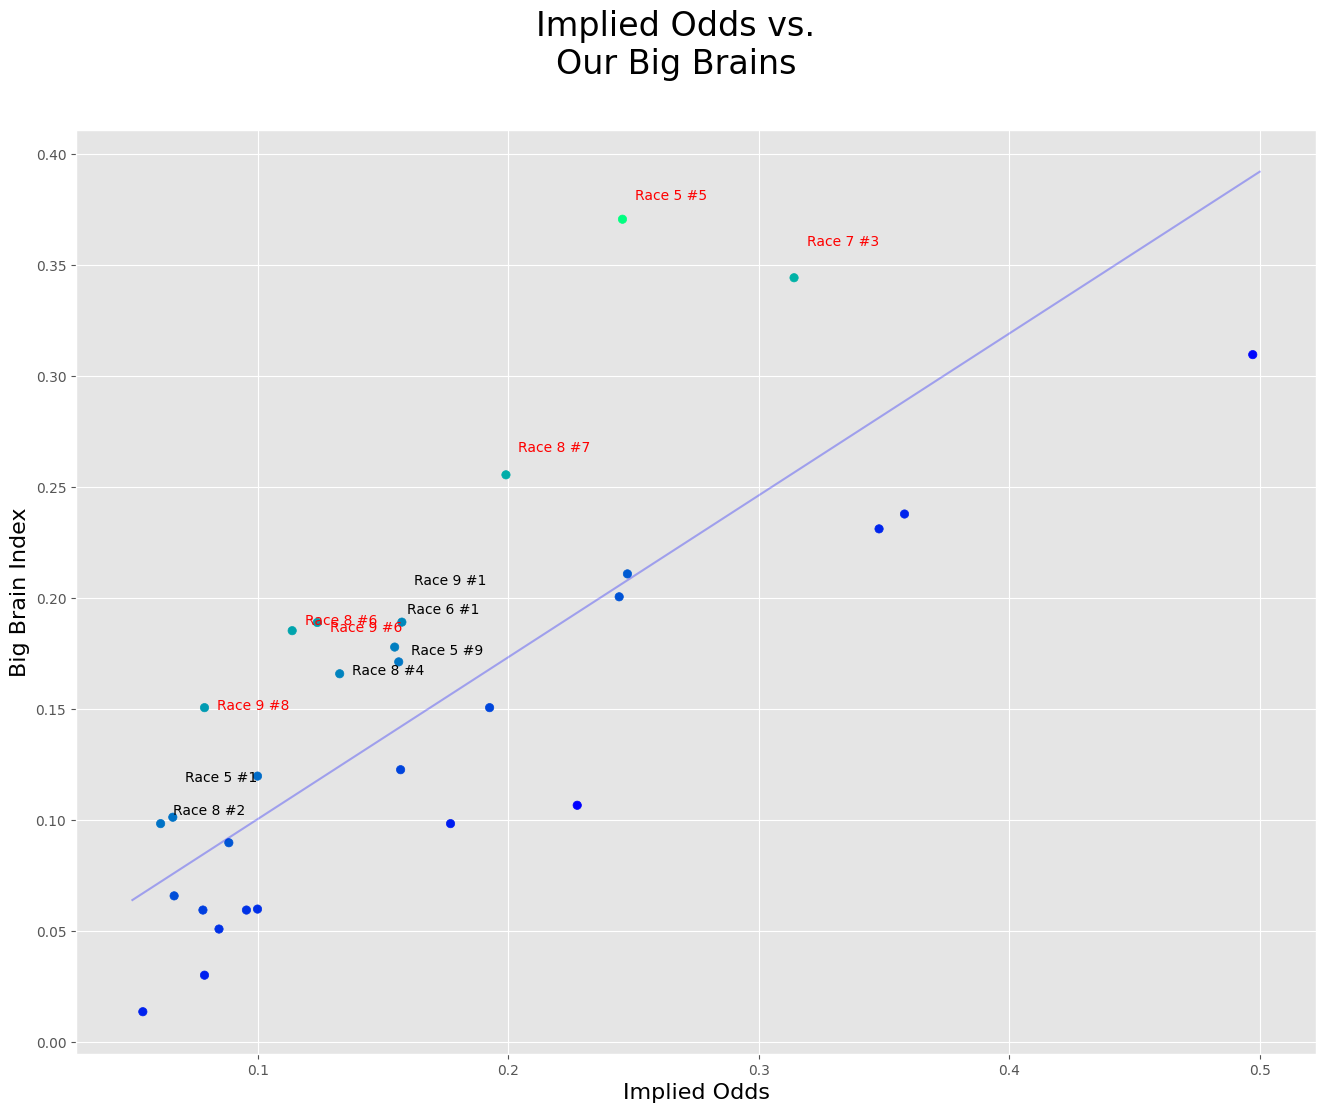

In [362]:

fig, ax = plt.subplots(figsize=[16, 12])
fig.suptitle("Implied Odds vs.\nOur Big Brains", fontsize=24)
ax.set_ylabel("Big Brain Index", fontsize=16)
ax.set_xlabel("Implied Odds", fontsize=16)
ax.scatter(composite['normalized_implied_odds'], composite['pct_points'], c=composite['big_brained'], cmap='winter')

lr = LinearRegression()
lr.fit(composite['implied_odds'].values.reshape(-1,1), composite['pct_points'].values.reshape(-1,1))
xrange = np.linspace(0.05, 0.5, 1000).reshape(-1,1)
y = lr.predict(xrange)

ax.plot(xrange, y, c='blue', alpha=0.3)

names = aggr['sharp'].values
composite['label'] = 'Race ' + composite['race'].copy().astype(str) + ' #' + composite['horse'].copy().astype(str)

for index, row in composite.iterrows():
    if row['big_brained'] > 0.05:
        ax.annotate(row['label'], (row['normalized_implied_odds']+0.005, row['pct_points']+np.random.random()*0.024-0.005), c='red')
    elif row['big_brained'] > 0.02:
        ax.annotate(row['label'], (row['normalized_implied_odds']+0.005, row['pct_points']+np.random.random()*0.024-0.005), c='k')
        
# for i, txt in enumerate(names):
#     if txt in ['Fat Bald Guy','Hersch','Somich','Plonk']:
#         ax.annotate(txt, (aggr.winners_per_pick.values[i]+0.005, aggr.ROI.values[i]+0.005), c='r')
#     elif txt=='Duke':
#         ax.annotate(txt, (aggr.winners_per_pick.values[i]+0.005, aggr.ROI.values[i]+0.005), c='k',alpha=0.001)
#     else:
#         ax.annotate(txt, (aggr.winners_per_pick.values[i]+0.005, aggr.ROI.values[i]+0.005), c='k')
    

plt.savefig("C:\\Users\Blake\Downloads\odds_baby.png")
plt.show()


In [33]:


alex_a = {
    5:[3],
    6:[8,12],
    7:[3,6],
    8:[4],
    9:[1,4],
    10:[3]
}

alex_b = {
    5:[4],
    6:[5,9],
    7:[7,10],
    8:[],
    9:[],
    10:[2,5,7]
}

nick_a = {
    5:[3],
    6:[8,12],
    7:[3,5,6,8],
    8:[4,5],
    9:[1,2,4],
    10:[2,3,5]
}

nick_b = {
    5:[4],
    6:[8,2,4,6,9,10],
    7:[3,1,2,4,9],
    8:[4,6],
    9:[4,6],
    10:[3,7,11,12]
}

holmes_a = {
    5:[3],
    6:[8,12,2,5],
    7:[3,5,6],
    8:[2,4,5],
    9:[1,2,6],
    10:[7,2,3,11]   
}

holmes_b = {
    5:[3,2,4],
    6:[8],
    7:[3,2,9],
    8:[4],
    9:[1,5],
    10:[7,6,12]   
}

marty_a = {
    5:[3,4],
    6:[5,6,8,9,12],
    7:[2,3,5],
    8:[4],
    9:[1,4,6],
    10:[3,7,11]
}
marty_b = {
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[]
}

jason_o_a = {
    5:[3,3],
    6:[8,9,10,12,6],
    7:[10,2,3,6],
    8:[4,4],
    9:[6,1,2,4],
    10:[7,8,3,11,2]
}

jason_o_b = {
    5:[3,2],
    6:[8,1,2,5],
    7:[10,5,8],
    8:[4, 2, 5],
    9:[6],
    10:[7,5,6,9]
}

hersch_a = {
    5:[2,3],
    6:[1,8],
    7:[10,3],
    8:[5,5,2],
    9:[6,2],
    10:[6,8]
}

hersch_b = {
    5:[5],
    6:[12],
    7:[7],
    8:[5],
    9:[1],
    10:[3]
}

kelsch_a = {
    5:[3,2,4],
    6:[12,6,8],
    7:[5,2,3],
    8:[4,5],
    9:[2,1,4],
    10:[3,2,7]
}
kelsch_b = {
    5:[3,1],
    6:[12,2,4,5],
    7:[5,6,10],
    8:[4,2,6],
    9:[2,6],
    10:[3,11]   
}
quincy_a = {
    5:[3],
    6:[12,8],
    7:[3],
    8:[4,2],
    9:[1],
    10:[7]
}
quincy_b = {
    5:[3],
    6:[12,2,4,5,6,9],
    7:[3,2,4,5,8,11],
    8:[4,5],
    9:[1,2],
    10:[7,3,9,11,12]
}

blake_a = {
    5:[3],
    6:[8,6],
    7:[3,2,6],
    8:[4],
    9:[1,2,6],
    10:[3,2,11]
}

blake_b = {
    5:[3,6],
    6:[8,9],
    7:[3,8,10],
    8:[4,6],
    9:[2,4],
    10:[]
}

kyle_a = {
    5:[1,3,4],
    6:[6,8,9,12],
    7:[2,3,5,6],
    8:[4],
    9:[2,4,6],
    10:[3,7,11,11]
}

kyle_b = {
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[11]
}

somich_a = {
    5:[],
    6:[],
    7:[3],
    8:[],
    9:[1,4],
    10:[]
}
somich_b = {
    5:[],
    6:[],
    7:[3,4,5,8],
    8:[],
    9:[1,2],
    10:[]
}

derosa_a = {
    5:[3],
    6:[8],
    7:[2,3,5],
    8:[4],
    9:[6],
    10:[13,3,7,11]
}

derosa_b = {
    5:[3,5,6],
    6:[8,2,6,9],
    7:[2,6],
    8:[4,2,3,5],
    9:[6,1],
    10:[13]
}





### Friday, April 28, 2023


In [34]:


kee_6 = pd.DataFrame({
    'date':np.repeat('Friday, April 28, 2023', 6),
    'track':np.repeat('Keeneland', 6),
    'race':list(range(5, 11)),
    'winner':[3,1,6,4,6,3],
    'second':[5,8,2,2,4,5],
    'win_paid':[3.36,36.32,11.44,3,6.82,4.62],
    'win_place_paid':[2.46,10.58,6.10,2.32,3.82,3.12],
    'second_paid':[4.66,3.40,6.56,3.12,5.38,7.92]
})

pick_dict = {
    'Nick':{'A':nick_a,'B':nick_b},
    'Jason_O':{'A':jason_o_a,'B':jason_o_b},
    'Holmes':{'A':holmes_a, 'B':holmes_b},
    'Hersch':{'A':hersch_a,'B':hersch_b},
    'Quincy':{'A':quincy_a,'B':quincy_b},
    'Kelsch':{'A':kelsch_a,'B':kelsch_b},
    'Marty':{'A':marty_a,'B':marty_b},
    'Blake':{'A':blake_a,'B':blake_b},
    'Alex':{'A':alex_a,'B':alex_b},
    'Kyle':{'A':kyle_a,'B':kyle_b},
    'Somich':{'A':somich_a,'B':somich_b},
    'Derosa':{'A':derosa_a,'B':derosa_b}
}

weights_dict = {
    'Nick':0.85,
    'Holmes':0.87,
    'Jason_O':0.87,
    'Hersch':1.4,
    'Quincy':1.1,
    'Kelsch':0.87,
    'Marty':1,
    'Blake':0.9,
    'Alex':1,
    'Kyle':2,
    'Somich':2,
    'Derosa':2
}

sharps = list(pick_dict.keys())

for sharp in sharps:
    kee_6[f'{sharp}_A'] = kee_6['race'].copy().map(pick_dict[sharp]['A'])
    kee_6[f'{sharp}_B'] = kee_6['race'].copy().map(pick_dict[sharp]['B'])
    
    kee_6[f'{sharp}_A'] = kee_6[f'{sharp}_A'].apply(lambda x: [] if np.any(np.isnan(x)) else x)
    kee_6[f'{sharp}_B'] = kee_6[f'{sharp}_B'].apply(lambda x: [] if np.any(np.isnan(x)) else x)
    
    kee_6[f'{sharp}_points'] = kee_6.apply(lambda x: 10*int(x['winner'] in x[f'{sharp}_A'])+5*int(x['winner'] in x[f'{sharp}_B']), axis=1)
    kee_6[f'{sharp}_horses_used'] = kee_6.apply(lambda x: len(x[f'{sharp}_A'])+0.5*len(x[f'{sharp}_B']), axis=1)
    
    kee_6[f'{sharp}_invested'] = kee_6[f'{sharp}_horses_used']*100 
    ## toggle this
    kee_6[f'{sharp}_return'] = ((kee_6['win_paid'].copy()/2)-1)*(kee_6[f'{sharp}_points']*10) + (kee_6[f'{sharp}_points']*10)
    



In [35]:

daily_summary = []

for sharp in sharps:
    sharp_roi = kee_6[f'{sharp}_return'].sum()/kee_6[f'{sharp}_invested'].sum()
    sharp_WPP = kee_6[f'{sharp}_points'].sum()/kee_6[f'{sharp}_horses_used'].sum()
    daily_summary.append([sharp, sharp_roi, sharp_WPP])

daily_summary = pd.DataFrame(daily_summary, columns=['Sharp', 'ROI', 'WinPerPick'])
daily_summary.sort_values(by=['ROI'], ascending=False)


,Sharp,ROI,WinPerPick
3,Hersch,1.525313,2.187500
1,Jason_O,0.885082,2.295082
7,Blake,0.876216,3.243243
8,Alex,0.862308,3.076923
11,Derosa,0.792368,3.157895
9,Kyle,0.749744,2.564103
2,Holmes,0.661633,2.448980
0,Nick,0.592800,2.200000
6,Marty,0.523529,2.352941
5,Kelsch,0.512000,2.200000


In [553]:

kee_6[['race']+[col for col in list(kee_6) if '_return' in col]]


,race,Nick_return,Jason_O_return,Holmes_return,Hersch_return,Quincy_return,Kelsch_return,Marty_return,Blake_return,Alex_return,Kyle_return,Somich_return
0,5,168.0,252.0,252.0,168.0,252.0,252.0,168.0,252.0,168.0,168.0,0.0
1,6,0.0,908.0,0.0,1816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,572.0,572.0,572.0,0.0,0.0,286.0,0.0,572.0,572.0,572.0,0.0
3,8,225.0,225.0,225.0,0.0,225.0,225.0,150.0,225.0,150.0,150.0,0.0
4,9,170.5,511.5,341.0,341.0,0.0,170.5,341.0,341.0,0.0,341.0,0.0
5,10,346.5,231.0,231.0,115.5,115.5,346.5,231.0,231.0,231.0,231.0,0.0


In [527]:

composite = kee_6.copy()
num_cappers = len(sharps)

UNIT_SIZE = 100
WIN_BET_THRESH = 0.75
PLACE_BET_THRESH = 0.66
composite = composite.melt(
    id_vars=['date','track','race'], 
    value_vars=[f'{sharp}_A' for sharp in sharps]+[f'{sharp}_B' for sharp in sharps], 
    var_name='sharp_name', 
    value_name='horse'
)
composite = composite.explode('horse').reset_index(drop=True)
composite['play_type'] = composite['sharp_name'].copy().apply(lambda x: x[-1])
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_A',''))
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_B',''))
composite = composite.dropna(subset=['horse']).reset_index(drop=True)


ml_array = np.array([
    [5, 3, 1, 0.8],
    [5, 4, 1, 4.5],
    [5, 2, 1, 3.5],
    [5, 5, 1, 6],
    [5, 1, 1, 15],
    [ 6,  8, 1, 2.5],
    [ 6, 12, 1, 3.5],
    [ 6,  5, 1, 20],
    [ 6,  6, 1, 6],
    [ 6,  9, 1, 6],
    [ 6,  2, 1, 10],
    [ 6,  1, 1, 20],
    [ 6,  4, 1, 15],
    [ 6, 10, 1, 8],
    [ 7,  3, 1, 2.5],
    [ 7,  5, 1, 4],
    [ 7,  2, 1, 6],
    [ 7,  6, 1, 8],
    [ 7, 10, 0, 6],
    [ 7,  8, 1, 15],
    [ 7,  7, 1, 15],
    [ 7,  4, 1, 8],
    [ 7,  9, 1, 20],
    [ 7, 11, 1, 30],
    [ 7,  1, 1, 15],
    [8, 4, 1, 0.6],
    [8, 5, 1, 3],
    [8, 2, 1, 4.5],
    [8, 6, 0, 8],
    [9, 1, 1, 0.8],
    [9, 2, 1, 6],
    [9, 6, 1, 4],
    [9, 4, 1, 3.5],
    [9, 5, 1, 15],
    [10,  3, 1, 2],
    [10,  7, 1, 5],
    [10, 11, 1, 3.5],
    [10,  2, 1, 10],
    [10,  6, 1, 12],
    [10,  8, 0, 8],
    [10,  5, 1, 10],
    [10, 12, 1, 15],
    [10,  9, 1, 20]
])
ml_df = pd.DataFrame(ml_array, columns=['race','horse','scratched','odds'])
ml_df['implied_odds'] = ml_df['odds'].apply(lambda x: (1/(1+x)))

composite['weight'] = composite['sharp_name'].apply(lambda x: weights_dict[x])
composite['points'] = composite['play_type'].map({'A':1,'B':0.5})
composite['points'] = composite['points'].copy()*composite['weight'].copy()
composite = composite.groupby(['date','track','race','horse'])['points'].sum().reset_index()
composite['race_total'] = composite.groupby(['race'])['points'].transform('sum')

## toggle
composite = composite.merge(ml_df, how='left', on=['race', 'horse'])
composite = composite.loc[composite['scratched']==1].reset_index(drop=True)
composite['implied_odds_sum'] = composite.groupby(['date','track','race'])['implied_odds'].transform('sum')
composite['normalized_implied_odds'] = composite['implied_odds'].copy()/composite['implied_odds_sum'].copy()

composite['pct_points'] = composite['points'].copy()/composite['race_total'].copy()
# composite = composite.sort_values(by=['race','points','
pick'], ascending=[True,False,True])
composite = composite.sort_values(by=['pct_points'], ascending=False)
# composite



In [528]:

composite['predicted'] = lr.predict(composite['normalized_implied_odds'].values.reshape(-1,1))
composite['BBC'] = composite['pct_points'].copy()-composite['predicted'].copy()
composite.sort_values(by='BBC', ascending=False)


,date,track,race,horse,points,race_total,scratched,odds,implied_odds,implied_odds_sum,normalized_implied_odds,pct_points,predicted,BBC
28,"Friday, April 28, 2023",Keeneland,9,2,10.195,40.575,1.0,6.0,0.142857,1.183135,0.120745,0.251263,0.104880,0.146383
2,"Friday, April 28, 2023",Keeneland,5,3,14.035,25.990,1.0,0.8,0.555556,1.164953,0.476891,0.540015,0.399354,0.140662
16,"Friday, April 28, 2023",Keeneland,7,3,15.720,50.090,1.0,2.5,0.285714,1.118171,0.255519,0.313835,0.216316,0.097519
36,"Friday, April 28, 2023",Keeneland,10,7,9.055,43.155,1.0,5.0,0.166667,1.091083,0.152753,0.209825,0.131346,0.078479
26,"Friday, April 28, 2023",Keeneland,8,5,7.075,25.685,1.0,3.0,0.250000,1.056818,0.236559,0.275453,0.200639,0.074813
29,"Friday, April 28, 2023",Keeneland,9,4,9.465,40.575,1.0,3.5,0.222222,1.183135,0.187825,0.233272,0.160344,0.072927
3,"Friday, April 28, 2023",Keeneland,5,4,5.230,25.990,1.0,4.5,0.181818,1.164953,0.156073,0.201231,0.134091,0.067140
10,"Friday, April 28, 2023",Keeneland,6,8,12.605,46.305,1.0,2.5,0.285714,1.153409,0.247713,0.272217,0.209862,0.062355
31,"Friday, April 28, 2023",Keeneland,9,6,8.335,40.575,1.0,4.0,0.200000,1.183135,0.169042,0.205422,0.144814,0.060608
38,"Friday, April 28, 2023",Keeneland,10,11,10.050,43.155,1.0,3.5,0.222222,1.091083,0.203671,0.232881,0.173447,0.059435


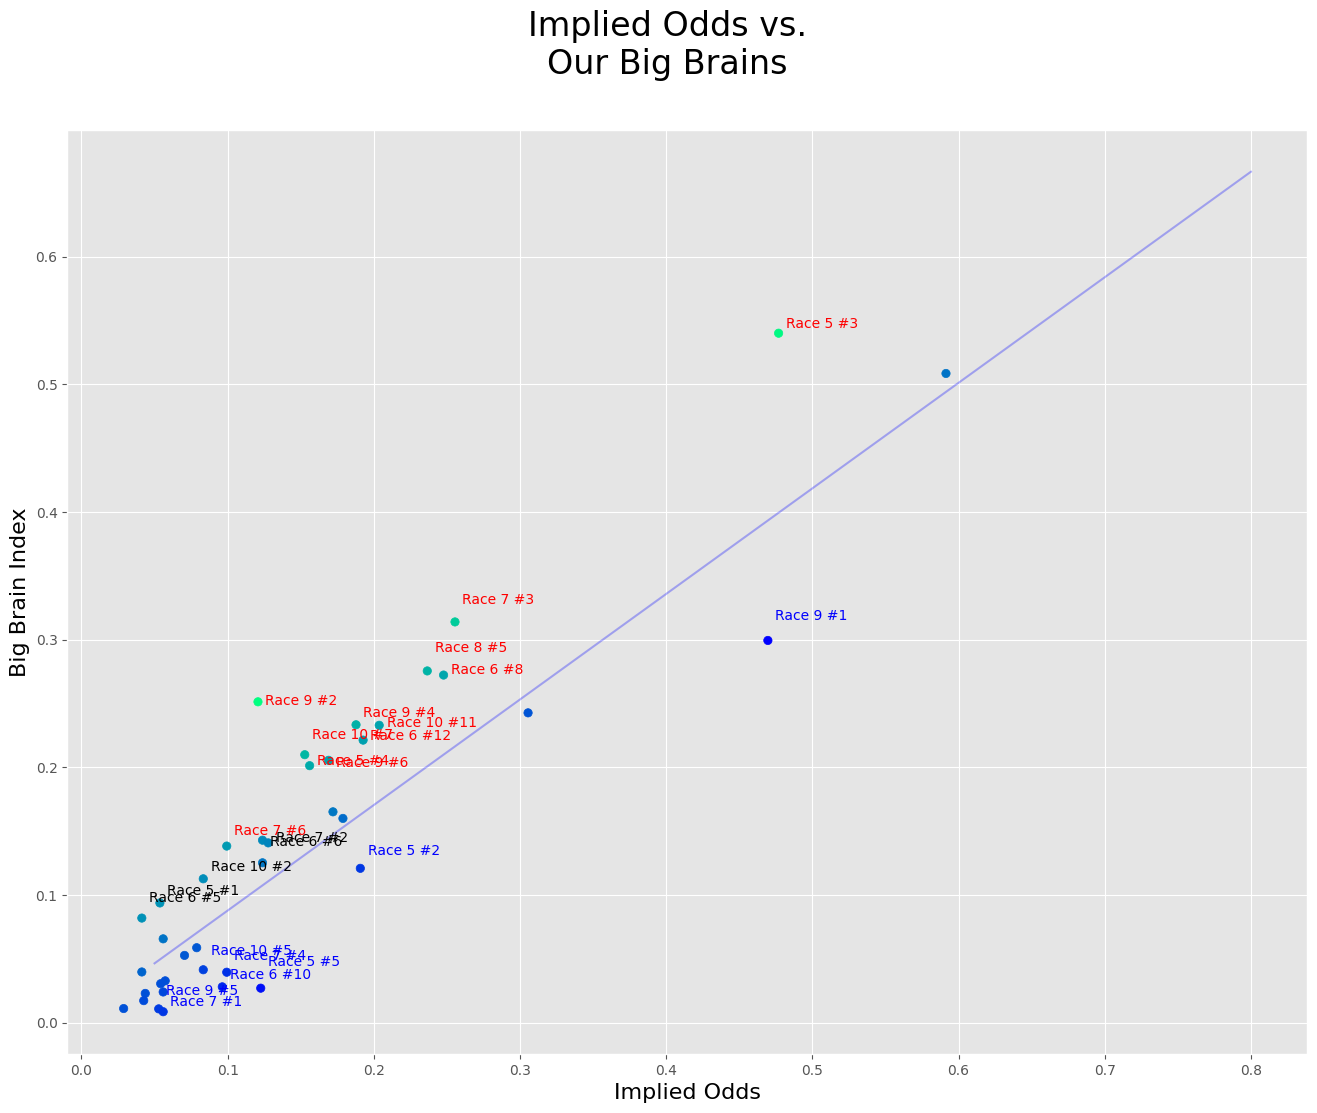

In [529]:

fig, ax = plt.subplots(figsize=[16, 12])
fig.suptitle("Implied Odds vs.\nOur Big Brains", fontsize=24)
ax.set_ylabel("Big Brain Index", fontsize=16)
ax.set_xlabel("Implied Odds", fontsize=16)
ax.scatter(composite['normalized_implied_odds'], composite['pct_points'], c=composite['BBC'], cmap='winter')

lr = LinearRegression()
lr.fit(composite['implied_odds'].values.reshape(-1,1), composite['pct_points'].values.reshape(-1,1))
xrange = np.linspace(0.05, 0.8, 1000).reshape(-1,1)
y = lr.predict(xrange)

ax.plot(xrange, y, c='blue', alpha=0.3)

names = aggr['sharp'].values
composite['label'] = 'Race ' + composite['race'].copy().astype(str) + ' #' + composite['horse'].copy().astype(str)

for index, row in composite.iterrows():
    if row['BBC'] > 0.05:
        ax.annotate(row['label'], (row['normalized_implied_odds']+0.005, row['pct_points']+np.random.random()*0.024-0.005), c='red')
    elif row['BBC'] > 0.02:
        ax.annotate(row['label'], (row['normalized_implied_odds']+0.005, row['pct_points']+np.random.random()*0.024-0.005), c='k')
    elif row['BBC'] < -0.03:
        ax.annotate(row['label'], (row['normalized_implied_odds']+0.005, row['pct_points']+np.random.random()*0.024-0.005), c='blue')

# for i, txt in enumerate(names):
#     if txt in ['Fat Bald Guy','Hersch','Somich','Plonk']:
#         ax.annotate(txt, (aggr.winners_per_pick.values[i]+0.005, aggr.ROI.values[i]+0.005), c='r')
#     elif txt=='Duke':
#         ax.annotate(txt, (aggr.winners_per_pick.values[i]+0.005, aggr.ROI.values[i]+0.005), c='k',alpha=0.001)
#     else:
#         ax.annotate(txt, (aggr.winners_per_pick.values[i]+0.005, aggr.ROI.values[i]+0.005), c='k')
    

plt.savefig("C:\\Users\Blake\Downloads\odds_baby.png")
plt.show()


In [510]:

composite.loc[composite['race']==10]


,date,track,race,horse,points,race_total,scratched,odds,implied_odds,implied_odds_sum,normalized_implied_odds,pct_points,predicted,BBC,label
33,"Friday, April 28, 2023",Keeneland,10,3,10.470,43.155,1.0,2.0,0.333333,1.091083,0.305507,0.242614,0.257648,-0.015034,Race 10 #3
38,"Friday, April 28, 2023",Keeneland,10,11,10.050,43.155,1.0,3.5,0.222222,1.091083,0.203671,0.232881,0.173447,0.059435,Race 10 #11
36,"Friday, April 28, 2023",Keeneland,10,7,9.055,43.155,1.0,5.0,0.166667,1.091083,0.152753,0.209825,0.131346,0.078479,Race 10 #7
32,"Friday, April 28, 2023",Keeneland,10,2,4.860,43.155,1.0,10.0,0.090909,1.091083,0.083320,0.112617,0.073936,0.038681,Race 10 #2
35,"Friday, April 28, 2023",Keeneland,10,6,2.270,43.155,1.0,12.0,0.076923,1.091083,0.070502,0.052601,0.063338,-0.010736,Race 10 #6
34,"Friday, April 28, 2023",Keeneland,10,5,1.785,43.155,1.0,10.0,0.090909,1.091083,0.083320,0.041363,0.073936,-0.032574,Race 10 #5
39,"Friday, April 28, 2023",Keeneland,10,12,1.410,43.155,1.0,15.0,0.062500,1.091083,0.057283,0.032673,0.052408,-0.019735,Race 10 #12
37,"Friday, April 28, 2023",Keeneland,10,9,0.985,43.155,1.0,20.0,0.047619,1.091083,0.043644,0.022825,0.041131,-0.018306,Race 10 #9


In [522]:


composite['pct_chance'] = composite[['pct_points','normalized_implied_odds']].mean(axis=1)
composite.loc[composite['race'].isin([6,8,10])][['race','horse','pct_chance','BBC']].sort_values(by='pct_chance', ascending=False).head(60)



,race,horse,pct_chance,BBC
25,8,4,0.549933,0.014436
33,10,3,0.274060,-0.015034
10,6,8,0.259965,0.062355
26,8,5,0.256006,0.074813
38,10,11,0.218276,0.059435
13,6,12,0.206958,0.056904
36,10,7,0.181289,0.078479
24,8,2,0.168560,0.017782
9,6,6,0.133357,0.035404
11,6,9,0.124502,0.017695


In [520]:

composite['is_bet'] = np.where(composite['BBC']>0.05, 1, 0)
composite['p'] = composite['pct_points'].copy()+0.3*composite['pct_points']
composite['q'] = 1-composite['p'].copy()
composite['bet_amount'] = (composite['p'].copy() - composite['q'].copy()/composite['odds'].copy())*100
composite['bet_amount'] = (composite['bet_amount'].copy()*composite['is_bet'].copy()).round(0)


In [524]:

composite.loc[composite['race']==10][['race','horse','BBC','pct_points','odds','is_bet','bet_amount']].sort_values(by=['BBC'], ascending=False)


,race,horse,BBC,pct_points,odds,is_bet,bet_amount
36,10,7,0.078479,0.209825,5.0,1,13.0
38,10,11,0.059435,0.232881,3.5,1,10.0
32,10,2,0.038681,0.112617,10.0,0,0.0
35,10,6,-0.010736,0.052601,12.0,0,-0.0
33,10,3,-0.015034,0.242614,2.0,0,-0.0
37,10,9,-0.018306,0.022825,20.0,0,-0.0
39,10,12,-0.019735,0.032673,15.0,0,-0.0
34,10,5,-0.032574,0.041363,10.0,0,-0.0


In [521]:


composite[['race','horse','BBC','pct_points','odds','is_bet','bet_amount']].sort_values(by=['BBC'], ascending=False)



,race,horse,BBC,pct_points,odds,is_bet,bet_amount
28,9,2,0.146383,0.251263,6.0,1,21.0
2,5,3,0.140662,0.540015,0.8,1,33.0
16,7,3,0.097519,0.313835,2.5,1,17.0
36,10,7,0.078479,0.209825,5.0,1,13.0
26,8,5,0.074813,0.275453,3.0,1,14.0
29,9,4,0.072927,0.233272,3.5,1,10.0
3,5,4,0.067140,0.201231,4.5,1,10.0
10,6,8,0.062355,0.272217,2.5,1,10.0
31,9,6,0.060608,0.205422,4.0,1,8.0
38,10,11,0.059435,0.232881,3.5,1,10.0


In [380]:

hist = pd.concat([kee_1.copy(),kee_2.copy(),kee_3.copy(),kee_4.copy(),kee_5.copy()],axis=0).reset_index(drop=True)



In [381]:

composite = hist.copy()
sharps = ['Quincy','Marty','Blake','Nick','Holmes','Jason_O','Duke','Kelsch','Kyle','Fat Bald Guy','Hersch','Somich','Plonk']
num_cappers = len(sharps)

weights_dict = {
    'Quincy':1,
    'Marty':1,
    'Blake':1,
    'Nick':1,
    'Holmes':1,
    'Jason_O':1,
    'Duke':1,
    'Kelsch':1,
    'Kyle':1.5,
    'Fat Bald Guy':0,
    'Hersch':2,
    'Somich':2,
    'Plonk':0
}


UNIT_SIZE = 100
WIN_BET_THRESH = 0.75
PLACE_BET_THRESH = 0.66
composite = composite.melt(
    id_vars=['date','track','race'], 
    value_vars=[f'{sharp}_A' for sharp in sharps]+[f'{sharp}_B' for sharp in sharps], 
    var_name='sharp_name', 
    value_name='pick'
)
composite = composite.explode('pick').reset_index(drop=True)
composite['play_type'] = composite['sharp_name'].copy().apply(lambda x: x[-1])
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_A',''))
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_B',''))
composite['weight'] = composite['sharp_name'].map(weights_dict)
composite['points'] = composite['play_type'].map({'A':1,'B':0.5})
composite['points'] = composite['points'].copy()*composite['weight'].copy()
composite = composite.groupby(['date','track','race','pick'])['points'].sum().reset_index()
composite = composite.sort_values(by=['race','points','pick'], ascending=[True,False,True])

composite['race_total'] = composite.groupby(['race'])['points'].transform('sum')
composite
# composite['pct_points'] = composite['points'].copy()/composite['race_total'].copy()

# composite.sort_values(by=['pct_points'], ascending=False).head(20)


,date,track,race,pick,points,race_total
191,"Wednesday, April 26, 2023",Keeneland,1,3,3.5,24.00
137,"Thursday, April 27, 2023",Keeneland,1,3,3.0,24.00
138,"Thursday, April 27, 2023",Keeneland,1,4,3.0,24.00
192,"Wednesday, April 26, 2023",Keeneland,1,4,3.0,24.00
190,"Wednesday, April 26, 2023",Keeneland,1,2,2.0,24.00
...,...,...,...,...,...,...
42,"Friday, April 21, 2023",Keeneland,10,9,2.0,81.25
94,"Saturday, April 22, 2023",Keeneland,10,14,2.0,81.25
84,"Saturday, April 22, 2023",Keeneland,10,1,1.0,81.25
43,"Friday, April 21, 2023",Keeneland,10,10,0.5,81.25


In [382]:

weights_dict = {
    'Quincy':1,
    'Marty':1,
    'Blake':1,
    'Nick':1,
    'Holmes':1,
    'Jason_O':1,
    'Duke':1,
    'Kelsch':1,
    'Kyle':1.5,
    'Fat Bald Guy':0,
    'Hersch':2,
    'Somich':2,
    'Plonk':0
}



In [392]:

composite = hist.copy()
sharps = ['Quincy','Marty','Blake','Nick','Holmes','Jason_O','Duke','Kelsch','Kyle','Fat Bald Guy','Hersch','Somich','Plonk']
num_cappers = len(sharps)

unit_size = 100
win_bet_thresh = 0.79
place_bet_thresh = 0.71

composite = composite.melt(
    id_vars=['date','track','race'], 
    value_vars=[f'{sharp}_A' for sharp in sharps]+[f'{sharp}_B' for sharp in sharps], 
    var_name='sharp_name', 
    value_name='pick'
)
composite = composite.explode('pick').reset_index(drop=True)
composite = composite.dropna(subset=['pick']).reset_index(drop=True)

## for normalizing
total = composite.copy().groupby(['date','track'])['sharp_name'].nunique()//2
total = total.reset_index()
total = total.rename(columns={'sharp_name':'total_weight'})

composite['play_type'] = composite['sharp_name'].copy().apply(lambda x: x[-1])
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_A',''))
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_B',''))
## drop when no one has a b
composite = composite.dropna(subset=['pick']).reset_index(drop=True)
composite['weight'] = composite['sharp_name'].apply(lambda x: weights_dict[x])
composite['points'] = composite['play_type'].map({'A':1,'B':0.5})
composite['points'] = composite['points'].copy()*composite['weight'].copy()
composite = composite.groupby(['date','track','race','pick'])['points'].sum().reset_index()
composite = composite.sort_values(by=['race','points','pick'], ascending=[True,False,True])

composite = composite.merge(total, how='left', on=['date','track'])

composite['horse_rating'] = composite['points'].copy()/composite['total_weight'].copy()
composite = composite.merge(hist[['date','track','race','winner','second','win_paid','win_place_paid','second_paid']], how='left', on=['date','track','race'])

composite['placed_win_bet'] = np.where(composite['horse_rating'] >= win_bet_thresh, 1, 0)
composite['placed_place_bet'] = np.where(((composite['horse_rating'] >= place_bet_thresh)&(composite['horse_rating'] < win_bet_thresh)), 1, 0)

composite['won'] = np.where(composite['winner']==composite['pick'],1,0)
composite['won_second'] = np.where(composite['second']==composite['pick'],1,0)
composite['invested'] = composite['placed_win_bet'].copy()*unit_size
composite['place_invested'] = composite['placed_place_bet'].copy()*unit_size

composite['win_bet_returned'] = composite['won']*composite['placed_win_bet'].copy()*((composite['win_paid'].copy()/2))*unit_size

composite['place_bet_first_returned'] = (composite['won'])*composite['placed_place_bet'].copy()*((composite['win_place_paid'].copy()/2))*unit_size
composite['place_bet_second_returned'] = (composite['won_second'])*composite['placed_place_bet'].copy()*((composite['second_paid'].copy()/2))*unit_size

composite['total_invested'] = composite['invested'].copy()+composite['place_invested'].copy()
composite['total_returned'] = composite['win_bet_returned'].copy()+composite['place_bet_first_returned'].copy()+composite['place_bet_second_returned'].copy()

composite['total_returned'].sum()


6026.0

In [393]:
composite['total_returned'].sum()-composite['total_invested'].sum()

-874.0

In [394]:


composite


,date,track,race,pick,points,total_weight,horse_rating,winner,second,win_paid,...,placed_place_bet,won,won_second,invested,place_invested,win_bet_returned,place_bet_first_returned,place_bet_second_returned,total_invested,total_returned
0,"Wednesday, April 26, 2023",Keeneland,1,3,3.5,6,0.583333,4,2,24.48,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0
1,"Thursday, April 27, 2023",Keeneland,1,3,3.0,7,0.428571,1,3,6.56,...,0,0,1,0,0,0.0,0.0,0.0,0,0.0
2,"Thursday, April 27, 2023",Keeneland,1,4,3.0,7,0.428571,1,3,6.56,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0
3,"Wednesday, April 26, 2023",Keeneland,1,4,3.0,6,0.500000,4,2,24.48,...,0,1,0,0,0,0.0,0.0,0.0,0,0.0
4,"Wednesday, April 26, 2023",Keeneland,1,2,2.0,6,0.333333,4,2,24.48,...,0,0,1,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,"Friday, April 21, 2023",Keeneland,10,9,2.0,6,0.333333,7,5,15.90,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0
245,"Saturday, April 22, 2023",Keeneland,10,14,2.0,11,0.181818,5,8,26.32,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0
246,"Saturday, April 22, 2023",Keeneland,10,1,1.0,11,0.090909,5,8,26.32,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0
247,"Friday, April 21, 2023",Keeneland,10,10,0.5,6,0.083333,7,5,15.90,...,0,0,0,0,0,0.0,0.0,0.0,0,0.0


In [395]:

sharps = ['Quincy','Nick','Blake','Marty','Holmes','Jason_O','Kelsch','Kyle','Duke','Fat Bald Guy','Hersch','Somich','Plonk']
num_races = []
invested = []
dollar_return = []
horses_used = []
points = []

for sharp in sharps:
    sharp_races = hist[f'{sharp}_horses_used'].notnull().sum()
    sharp_invested = hist[f'{sharp}_horses_used'].sum()*100- (hist[f'{sharp}_points'].sum()*10)
    sharp_horses_used = hist[f'{sharp}_horses_used'].sum()
    sharp_return = hist[f'{sharp}_return'].sum()
    sharp_points = hist[f'{sharp}_points'].sum()
    
    num_races.append(sharp_races)
    invested.append(sharp_invested)
    horses_used.append(sharp_horses_used)
    dollar_return.append(sharp_return)
    points.append(sharp_points)
    
    
aggr = pd.DataFrame({
    'sharp':sharps,
    'race_sample':num_races,
    'horses_used':horses_used,
    'points':points,
    'winners_per_pick':np.array(points)/np.array(horses_used),
    'invested':invested,
    'return':dollar_return,
    'ROI':np.array(dollar_return)/np.array(invested)
})

aggr.sort_values(by=['winners_per_pick'], ascending=False)


,sharp,race_sample,horses_used,points,winners_per_pick,invested,return,ROI
10,Hersch,29,78.0,160.0,2.051282,6200.0,5991.5,0.966371
11,Somich,6,17.0,30.0,1.764706,1400.0,2210.0,1.578571
3,Marty,29,75.0,130.0,1.733333,6200.0,5009.0,0.807903
2,Blake,35,99.0,170.0,1.717172,8200.0,7473.0,0.911341
7,Kyle,6,18.0,30.0,1.666667,1500.0,2098.5,1.399000
0,Quincy,35,123.5,205.0,1.659919,10300.0,7883.5,0.765388
1,Nick,35,97.0,150.0,1.546392,8200.0,6999.5,0.853598
4,Holmes,35,85.0,125.0,1.470588,7250.0,5112.5,0.705172
5,Jason_O,35,103.5,140.0,1.352657,8950.0,7541.0,0.842570
6,Kelsch,29,58.0,70.0,1.206897,5100.0,3961.5,0.776765


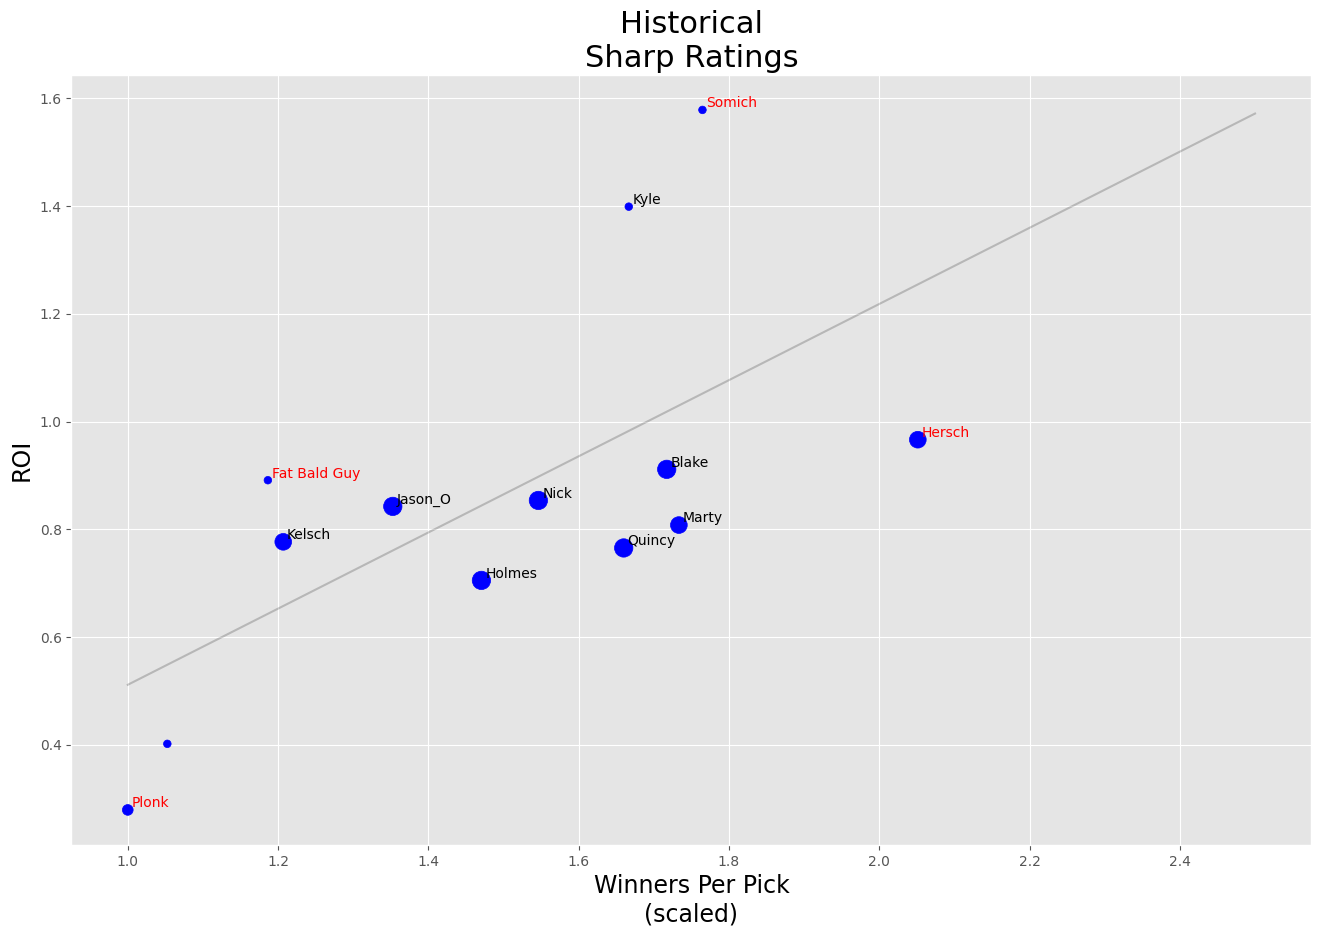

In [396]:

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(aggr['winners_per_pick'].values.reshape(-1,1), aggr['ROI'].values.reshape(-1,1))
xrange = np.linspace(1, 2.5, 1000).reshape(-1,1)
y = lr.predict(xrange)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(16,10))
ax.set_title("Historical\nSharp Ratings",fontsize=22)
ax.set_xlabel("Winners Per Pick\n(scaled)",fontsize=17)
ax.set_ylabel("ROI",fontsize=17)
ax.scatter(aggr['winners_per_pick'], aggr['ROI'], c='blue', s=aggr['race_sample']*5)
ax.plot(xrange, y, c='k', alpha=0.2)
names = aggr['sharp'].values
for i, txt in enumerate(names):
    if txt in ['Fat Bald Guy','Hersch','Somich','Plonk']:
        ax.annotate(txt, (aggr.winners_per_pick.values[i]+0.005, aggr.ROI.values[i]+0.005), c='r')
    elif txt=='Duke':
        ax.annotate(txt, (aggr.winners_per_pick.values[i]+0.005, aggr.ROI.values[i]+0.005), c='k',alpha=0.001)
    else:
        ax.annotate(txt, (aggr.winners_per_pick.values[i]+0.005, aggr.ROI.values[i]+0.005), c='k')
    


def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)
# paths = [
#     'a.jpg',
#     'b.jpg',
#     'c.jpg',
#     'd.jpg',
#     'e.jpg']
    
# x = [0,1,2,3,4]
# y = [0,1,2,3,4]
# for x0, y0, path in zip(x, y,paths):
#     ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
#     ax.add_artist(ab)

# x

plt.savefig("C://Users/Blake/Downloads/sharps.png")
plt.show()



In [24]:

composite = kee_3.copy()
num_cappers = len(sharps)
total_cap_weight=num_cappers+0.3
unit_size = 100
betting_thres = 0.715
composite = composite.melt(
    id_vars=['date','track','race'], 
    value_vars=[f'{sharp}_A' for sharp in sharps]+[f'{sharp}_B' for sharp in sharps], 
    var_name='sharp_name', 
    value_name='pick'
)
composite = composite.explode('pick').reset_index(drop=True)
composite['play_type'] = composite['sharp_name'].copy().apply(lambda x: x[-1])
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_A',''))
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_B',''))
## drop when no one has a b
composite = composite.dropna(subset=['pick']).reset_index(drop=True)
composite['weight'] = composite['sharp_name'].apply(lambda x: pick_dict[x]['weight'])
composite['points'] = composite['play_type'].map({'A':1,'B':0.5})
composite['points'] = composite['points'].copy()*composite['weight'].copy()
composite = composite.groupby(['date','track','race','pick'])['points'].sum().reset_index()
composite = composite.sort_values(by=['race','points','pick'], ascending=[True,False,True])
composite['total_weight']=total_cap_weight
composite['horse_rating'] = composite['points'].copy()/composite['total_weight'].copy()
composite = composite.merge(kee_3[['date','track','race','winner','win_paid']], how='left', on=['date','track','race'])
composite['placed_bet'] = np.where(composite['horse_rating'] >= betting_thres, 1, 0)
# composite['won'] = np.where(composite['winner']==composite['pick'],1,0)
# composite['invested'] = composite['placed_bet'].copy()*unit_size
# composite['returned'] = composite['won']*composite['placed_bet'].copy()*((composite['paid'].copy()/2))*unit_size

# print((composite['returned'].copy()-composite['invested'].copy()).sum())
# print(composite['returned'].sum()/composite['invested'].sum())
composite['final_odds'] = 0
composite['place'] = 0
composite['net_roi'] = 0
composite[['race','final_odds','place','pick','points','horse_rating','net_roi']]



composite = kee_1.copy()
num_cappers = 6
unit_size = 100
win_bet_thres = 0.75
place_bet_thres = 0.66
composite = composite.melt(id_vars=['date','track','race'], value_vars=[
    'Quincy_A','Quincy_B',
    'Nick_A','Nick_B',
    'Blake_A','Blake_B',
    'Marty_A','Marty_B',
    'Holmes_A','Holmes_B',
    'Jason_O_A','Jason_O_B',
    'Hersch_A','Hersch_B',
], var_name='sharp_name', value_name='pick')
composite = composite.explode('pick').reset_index(drop=True)
composite['play_type'] = composite['sharp_name'].copy().apply(lambda x: x[-1])
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_A',''))
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_B',''))
## drop when no one has a b
composite = composite.dropna(subset=['pick']).reset_index(drop=True)
composite['points'] = composite['play_type'].map({'A':1,'B':0.5})
composite = composite.groupby(['date','track','race','pick'])['points'].sum().reset_index()
composite = composite.sort_values(by=['race','points','pick'], ascending=[True,False,True])
composite['num_cappers']=num_cappers
composite['horse_rating'] = composite['points'].copy()/composite['num_cappers'].copy()
composite = composite.merge(kee_1[['date','track','race','winner','win_paid']], how='left', on=['date','track','race'])
composite['placed_bet'] = np.where(composite['horse_rating'] >= betting_thres, 1, 0)
composite['won'] = np.where(composite['winner']==composite['pick'],1,0)
composite['invested'] = composite['placed_bet'].copy()*unit_size
composite['returned'] = composite['won']*composite['placed_bet'].copy()*((composite['win_paid'].copy()/2))*unit_size

print((composite['returned'].copy()-composite['invested'].copy()).sum())
print(composite['returned'].sum()/composite['invested'].sum())


composite = kee_2.copy()
num_cappers = len(sharps)
total_cap_weight=num_cappers+0.3
unit_size = 100
betting_thres = 0.72
composite = composite.melt(
    id_vars=['date','track','race'], 
    value_vars=[f'{sharp}_A' for sharp in sharps]+[f'{sharp}_B' for sharp in sharps], 
    var_name='sharp_name', 
    value_name='pick'
)
composite = composite.explode('pick').reset_index(drop=True)
composite['play_type'] = composite['sharp_name'].copy().apply(lambda x: x[-1])
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_A',''))
composite['sharp_name'] = composite['sharp_name'].apply(lambda x: x.replace('_B',''))
## drop when no one has a b
composite = composite.dropna(subset=['pick']).reset_index(drop=True)
composite['weight'] = composite['sharp_name'].apply(lambda x: pick_dict[x]['weight'])
composite['points'] = composite['play_type'].map({'A':1,'B':0.5})
composite['points'] = composite['points'].copy()*composite['weight'].copy()
composite = composite.groupby(['date','track','race','pick'])['points'].sum().reset_index()
composite = composite.sort_values(by=['race','points','pick'], ascending=[True,False,True])
composite['total_weight']=total_cap_weight
composite['horse_rating'] = composite['points'].copy()/composite['total_weight'].copy()
composite = composite.merge(kee_2[['date','track','race','winner','win_paid']], how='left', on=['date','track','race'])
composite['placed_bet'] = np.where(composite['horse_rating'] >= betting_thres, 1, 0)
# composite['won'] = np.where(composite['winner']==composite['pick'],1,0)
# composite['invested'] = composite['placed_bet'].copy()*unit_size
# composite['returned'] = composite['won']*composite['placed_bet'].copy()*((composite['paid'].copy()/2))*unit_size

# print((composite['returned'].copy()-composite['invested'].copy()).sum())
# print(composite['returned'].sum()/composite['invested'].sum())
composite['final_odds'] = 0
composite['place'] = 0
composite['net_roi'] = 0
composite[['race','final_odds','place','pick','points','horse_rating','net_roi']]


KeyError: "The following 'value_vars' are not present in the DataFrame: ['Duke_A', 'Duke_B', 'Fat Bald Guy_A', 'Fat Bald Guy_B', 'Hersch_A', 'Hersch_B', 'Kyle_A', 'Kyle_B', 'Marty_A', 'Marty_B', 'Somich_A', 'Somich_B']"